In [1]:
%pip install statsmodels
%pip install pandas
%pip install python-dotenv
%pip install seaborn
%pip install matplotlib
%pip install pyodbc
%pip install numpy
%pip install xlrd
%pip install openpyxl
%pip install scikit-learn
%pip install plotly
%pip install xgboost
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing needed libraries

import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from dotenv import dotenv_values
import pyodbc
import os
import pickle
import xgboost as xgb
import sklearn as scikitlearn

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor



from xgboost import XGBRegressor
from sklearn import metrics
from statsmodels.tsa.ar_model import AutoReg, AR
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score


from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats
from scipy.stats import norm, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [3]:
oil_data = pd.read_csv(r"C:\Users\HP\Downloads\oil.csv")

In [4]:
oil_data.head()

Unnamed: 0        date  dcoilwtico
0           0  2013-01-01         NaN
1           1  2013-01-02   93.139999
2           2  2013-01-03   92.970001
3           3  2013-01-04   93.120003
4           4  2013-01-07   93.199997

In [5]:
oil_data.tail()

Unnamed: 0        date  dcoilwtico
1213        1213  2017-08-25   47.650002
1214        1214  2017-08-28   46.400002
1215        1215  2017-08-29   46.459999
1216        1216  2017-08-30   45.959999
1217        1217  2017-08-31   47.259998

In [6]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1218 non-null   int64  
 1   date        1218 non-null   object 
 2   dcoilwtico  1175 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ KB


In [7]:
oil_data.isnull().sum()

Unnamed: 0     0
date           0
dcoilwtico    43
dtype: int64

In [8]:
#selecting table_2
hol_events = pd.read_csv(r"C:\Users\HP\Downloads\holiday_events.csv")

In [9]:
hol_events.head()

Unnamed: 0        date     type    locale locale_name  \
0           0  2012-03-02  Holiday     Local       Manta   
1           1  2012-04-01  Holiday  Regional    Cotopaxi   
2           2  2012-04-12  Holiday     Local      Cuenca   
3           3  2012-04-14  Holiday     Local    Libertad   
4           4  2012-04-21  Holiday     Local    Riobamba   

                     description  transferred  
0             Fundacion de Manta        False  
1  Provincializacion de Cotopaxi        False  
2            Fundacion de Cuenca        False  
3      Cantonizacion de Libertad        False  
4      Cantonizacion de Riobamba        False

In [10]:
hol_events.tail()

Unnamed: 0        date        type    locale locale_name description  \
345         345  2017-12-22  Additional  National     Ecuador   Navidad-3   
346         346  2017-12-23  Additional  National     Ecuador   Navidad-2   
347         347  2017-12-24  Additional  National     Ecuador   Navidad-1   
348         348  2017-12-25     Holiday  National     Ecuador     Navidad   
349         349  2017-12-26  Additional  National     Ecuador   Navidad+1   

     transferred  
345        False  
346        False  
347        False  
348        False  
349        False

In [11]:
hol_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   350 non-null    int64 
 1   date         350 non-null    object
 2   type         350 non-null    object
 3   locale       350 non-null    object
 4   locale_name  350 non-null    object
 5   description  350 non-null    object
 6   transferred  350 non-null    bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 16.9+ KB


In [12]:
hol_events.isnull().sum()

Unnamed: 0     0
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [13]:
# Iterate through each column and get unique values

unique_values_per_column = {}
for column in hol_events.columns:
    unique_values_per_column[column] = hol_events[column].unique()

# Print the unique values for each column
for column, unique_values in unique_values_per_column.items():
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Unnamed: 0': [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

In [14]:
#selecting table3
stores_data = pd.read_csv(r"C:\Users\HP\Downloads\stores.csv")

In [15]:
stores_data.head()

Unnamed: 0  store_nbr           city                           state type  \
0           0          1          Quito                       Pichincha    D   
1           1          2          Quito                       Pichincha    D   
2           2          3          Quito                       Pichincha    D   
3           3          4          Quito                       Pichincha    D   
4           4          5  Santo Domingo  Santo Domingo de los Tsachilas    D   

   cluster  
0       13  
1       13  
2        8  
3        9  
4        4

In [16]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  54 non-null     int64 
 1   store_nbr   54 non-null     int64 
 2   city        54 non-null     object
 3   state       54 non-null     object
 4   type        54 non-null     object
 5   cluster     54 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.7+ KB


In [17]:
train_data = pd.read_csv(r"C:\Users\HP\OneDrive - Azubi Africa\Desktop\LP3\Regression-Project\train.csv")
train_data.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [18]:
train_data.tail()

id        date  store_nbr                      family     sales  \
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [20]:
train_data['store_nbr'].nunique()

54

In [21]:
trans_data = pd.read_csv(r"C:\Users\HP\OneDrive - Azubi Africa\Desktop\LP3\Regression-Project\transactions.csv")
trans_data.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [22]:
trans_data['store_nbr'].nunique()

54

In [23]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [24]:
sample_submission = pd.read_csv(r"C:\Users\HP\OneDrive - Azubi Africa\Desktop\LP3\Regression-Project\sample_submission.csv")
sample_submission.head()

id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0

In [25]:
sample_submission.tail()

id  sales
28507  3029395    0.0
28508  3029396    0.0
28509  3029397    0.0
28510  3029398    0.0
28511  3029399    0.0

In [26]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [27]:
test_data = pd.read_csv(r"C:\Users\HP\OneDrive - Azubi Africa\Desktop\LP3\Regression-Project\test.csv")
test_data.head()

id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

#### BUSINESS UNDERSTANDING

##### PROJECT TITLE
A Trend Analysis on CORPORATION FAVORITA - An Ecudorian-based Grocery Retailer

##### PROJECT DESCRIPTION
In the rapidly evolving business environment of grocery retail, data-driven insights are paramount to success. This project focuses on the development of a predictive Machine Learning model that unravels the sales trends within Favorita's wide store network, providing valuable insights into  unit sales of various items, seasonal variations, impact of events, and store-specific behaviors.

Our aim is to provide FAVORITA with a more accurate sales prediction modelto enable them optimize inventory management, anticipate demand fluctuations, and strategically plan promotions.

#### Hypothesis:

##### Null Hypothesis: Promotions do not have a positive impact on overall sales.

##### Alternate Hypothesis: Promotions have a positive impact on overall sales.


#### Data Mining Goals & Research Questions

SALES TRENDS

1. How have sales trends evolved over the years? Are there seasonality patterns?

2. How do promotions impact sales? Is there a significant spike in sales when products are on promotion?

3. What are the top 10 best/worst stores and their best selling products?

4. How do transactions correlate with sales? Do more transactions always mean higher sales?

HOLIDAYS&EVENTS ANALYSIS

5. How many holidays/events occur on a local, regional, or national scale?

6. How did the earthquake on April 16 2016 impact sales?

OIL PRICE ANALYSIS

7. What is the trend in oil prices over time?

8. Are there specific months or periods when oil prices spike or dip?


##### Hypothesis Testing

In [28]:
# Extracting the 'sales' column for each group
sales_promotion = train_data[train_data['onpromotion'] == 1]['sales']
sales_no_promotion = train_data[train_data['onpromotion'] == 0]['sales']

# Performing a two-sample t-test
t_statistic, p_value = stats.ttest_ind(sales_promotion, sales_no_promotion, equal_var=False)

# Defining the significance level (alpha)
alpha = 0.05

# Comparing the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Promotions have a significant impact on sales.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant impact of promotions on sales.")

Reject the null hypothesis.
Promotions have a significant impact on sales.


- The rejection of the null Hypothesis indicates that promotions play a meaningful role in influencing the level of sales. In other words, when promotions are implemented, they lead to changes in sales volume. And also it has a statistical significance to mean that the relationship between promotions and sales is strong enough that it's unlikely to have arisen purely due to random fluctuations or noise in the data.

#### Exploratory Data Analysis

***train_data***

In [29]:
train_data.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


date is an object datatype. Let change it to datetime datatype


In [31]:
train_data['date'] = pd.to_datetime(train_data['date'])


train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


Now the 'date' column has been converted to datetime data type


Check for null values

In [32]:
train_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

No null values in train_data

Check for outliers in sales column

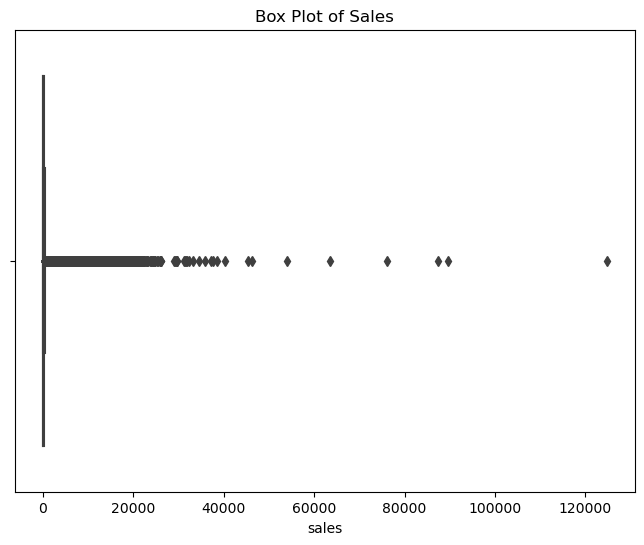

Number of outliers in 'sales' column: 447105


In [33]:
plt.figure(figsize=(8, 6))

# Create a box plot for the 'sales' column
sns.boxplot(x=train_data['sales'])
plt.title('Box Plot of Sales')
plt.show()

# Calculate the IQR for the 'sales' column
Q1 = train_data['sales'].quantile(0.25)
Q3 = train_data['sales'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (train_data['sales'] < (Q1 - 1.5 * IQR)) | (train_data['sales'] > (Q3 + 1.5 * IQR))

# Count the number of outliers
outlier_count = outliers.sum()

print("Number of outliers in 'sales' column:", outlier_count)

Checking for trend linearity

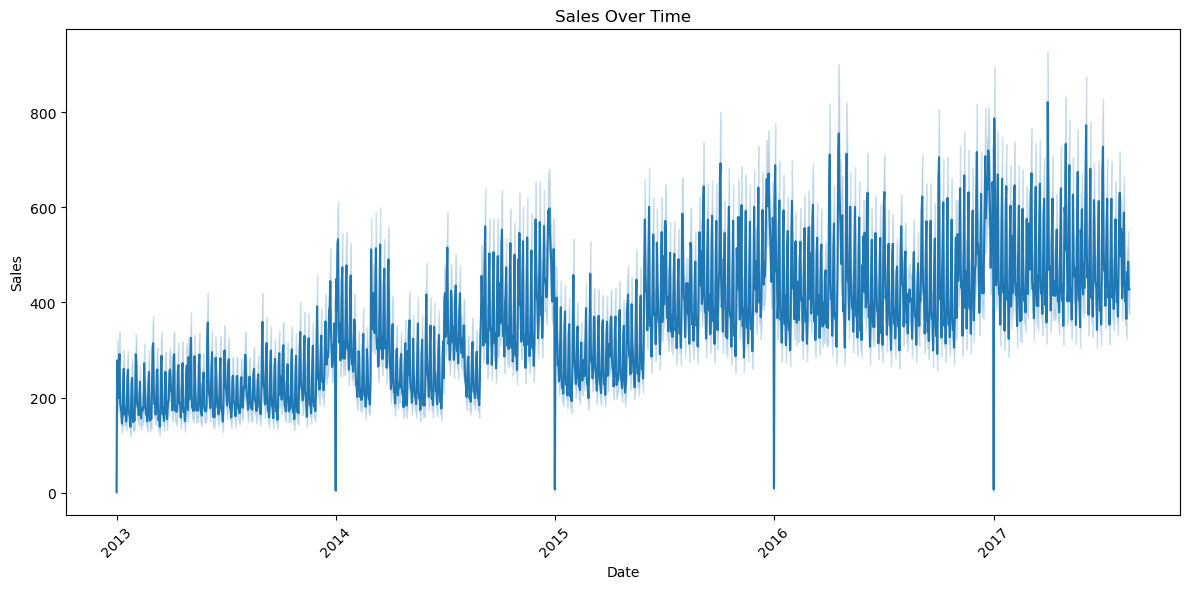

In [34]:
plt.figure(figsize=(12, 6))

# Create a line plot of sales over time
sns.lineplot(x='date', y='sales', data=train_data)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### As it is Shown in the above figure we see that there are seasonality patterns of sales over the years and often reflect changes in customer behavior, such as holiday shopping, weather-related preferences, or cultural events. By identifying these patterns, businesses can gain insights into their customers' buying habits and tailor marketing and product strategies accordingly.

Sales Distribution by Year

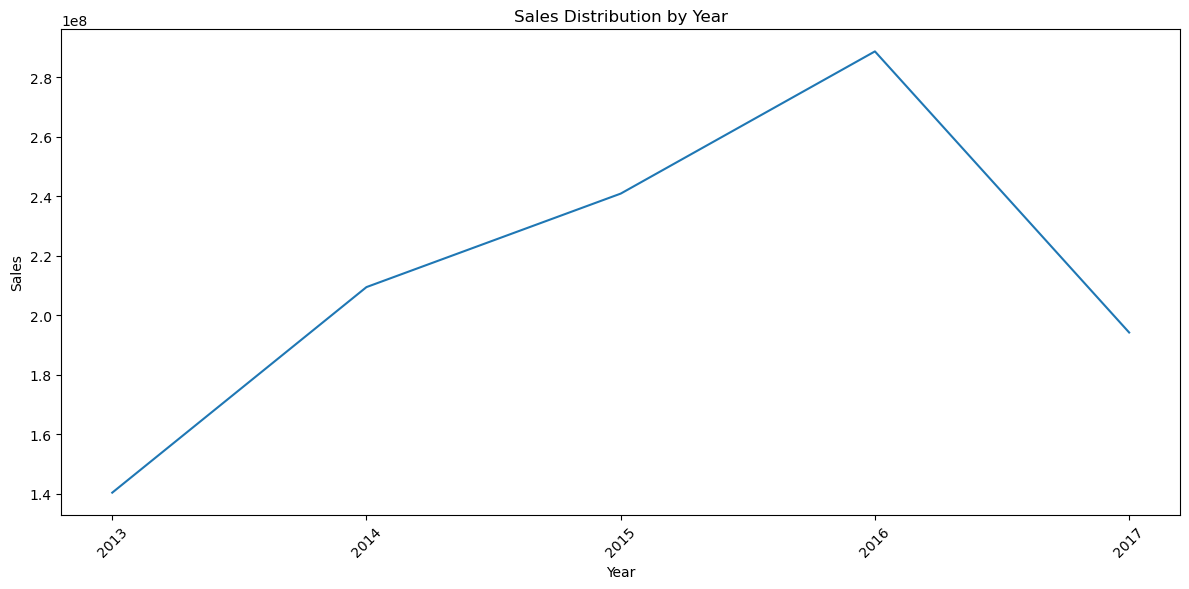

In [35]:
plt.figure(figsize=(12, 6))

# Extract the year from the 'date' column
train_data['year'] = train_data['date'].dt.year

# Group sales data by year and calculate the sum of sales for each year
sales_by_year = train_data.groupby('year')['sales'].sum().reset_index()

# Plot sales distribution by year
sns.lineplot(x='year', y='sales', data=sales_by_year)

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Distribution by Year')
plt.xticks(sales_by_year['year'].astype(int), rotation=45)  # Convert years to integers
plt.tight_layout()
plt.show()

###### External factors such as global events, natural disasters, or political instability can have a profound impact on sales. An unforeseen event around 2016 might have disrupted supply chains, reduced consumer confidence, or affected business operations, leading to decreased sales.

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 160.3+ MB


***oil_data***

In [37]:
oil_data.head()

Unnamed: 0        date  dcoilwtico
0           0  2013-01-01         NaN
1           1  2013-01-02   93.139999
2           2  2013-01-03   92.970001
3           3  2013-01-04   93.120003
4           4  2013-01-07   93.199997

In [38]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1218 non-null   int64  
 1   date        1218 non-null   object 
 2   dcoilwtico  1175 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ KB


date is an object datatype. Let change it to datetime datatype

In [39]:
oil_data['date'] = pd.to_datetime(oil_data['date'])

oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1218 non-null   int64         
 1   date        1218 non-null   datetime64[ns]
 2   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 28.7 KB


Now the 'date' column has been converted to datetime data type

Check for null values

In [40]:
oil_data.isnull().sum()

Unnamed: 0     0
date           0
dcoilwtico    43
dtype: int64

We have 43 missed values in dcoilwtico.

Let check for outliers.

In [41]:
column_name = 'dcoilwtico'

# Calculate the IQR
Q1 = oil_data[column_name].quantile(0.25)
Q3 = oil_data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = oil_data[(oil_data[column_name] < lower_bound) | (oil_data[column_name] > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Unnamed: 0, date, dcoilwtico]
Index: []


No outliers.

The choice between using forward fill (ffill) and backward fill (bfill) for imputation.

In [42]:

# Histogram
histogram_fig = px.histogram(oil_data, x='dcoilwtico', nbins=30, title="Distribution of 'dcoilwtico'")
histogram_fig.show()

# Box Plot
boxplot_fig = px.box(oil_data, y='dcoilwtico', title="Box Plot of 'dcoilwtico'")
boxplot_fig.show()



# Convert 'date' column to datetime format
oil_data['date'] = pd.to_datetime(oil_data['date'])

# Create a time-series line chart with missing value markers
line_chart_fig = px.line(oil_data, x='date', y='dcoilwtico', title="Time-Series of 'dcoilwtico'",
                         markers=True, # Add markers at data points
                         line_shape='linear', # Linear line shape
                         )

# Add vertical lines to indicate missing values
missing_dates = oil_data[oil_data['dcoilwtico'].isnull()]['date']
for date in missing_dates:
    line_chart_fig.add_shape(type="line",
                             x0=date, x1=date,
                             y0=0, y1=1,
                             xref="x", yref="paper",
                             line=dict(color="red", dash="dash")
                             )
    line_chart_fig.add_annotation(text="", x=date, y=1.02, xref="x", yref="paper", showarrow=False)

line_chart_fig.update_xaxes(tickangle=45)
line_chart_fig.show()


If your time-series data exhibits both ups and downs, using interpolation methods, particularly linear interpolation, can be a more appropriate approach. Linear interpolation takes into account the changing trends and fluctuations in the data and can provide a more accurate imputation.

In [43]:
# Interpolate missing values using linear interpolation
oil_data['dcoilwtico'] = oil_data['dcoilwtico'].interpolate()

# Create a time-series line chart with missing value markers
line_chart_fig = px.line(oil_data, x='date', y='dcoilwtico', title="Time-Series of 'dcoilwtico'",
                         markers=True, # Add markers at data points
                         line_shape='linear', # Linear line shape
                         )

# Add vertical lines to indicate missing values
missing_dates = oil_data[oil_data['dcoilwtico'].isnull()]['date']
for date in missing_dates:
    line_chart_fig.add_shape(type="line",
                             x0=date, x1=date,
                             y0=0, y1=1,
                             xref="x", yref="paper",
                             line=dict(color="red", dash="dash")
                             )
    line_chart_fig.add_annotation(text="Missing Value", x=date, y=1.02, xref="x", yref="paper", showarrow=False)

line_chart_fig.update_xaxes(tickangle=45)
line_chart_fig.show()

The first missing value cannot be imputed using linear interpolation alone. Lets use bfill.

In [44]:
# Use backward filling to impute the first missing value
oil_data['dcoilwtico'] = oil_data['dcoilwtico'].fillna(method='bfill')
# Create a time-series line chart with missing value markers
line_chart_fig = px.line(oil_data, x='date', y='dcoilwtico', title="Time-Series of 'dcoilwtico'",
                         markers=True, # Add markers at data points
                         line_shape='linear', # Linear line shape
                         )

# Add vertical lines to indicate missing values
missing_dates = oil_data[oil_data['dcoilwtico'].isnull()]['date']
for date in missing_dates:
    line_chart_fig.add_shape(type="line",
                             x0=date, x1=date,
                             y0=0, y1=1,
                             xref="x", yref="paper",
                             line=dict(color="red", dash="dash")
                             )
    line_chart_fig.add_annotation(text="Missing Value", x=date, y=1.02, xref="x", yref="paper", showarrow=False)

line_chart_fig.update_xaxes(tickangle=45)
line_chart_fig.show()

Now we have no missing value.

In [45]:
oil_data.isnull().sum()

Unnamed: 0    0
date          0
dcoilwtico    0
dtype: int64

Rename 'dcoilwtico' to 'oil_price'

In [46]:
oil_data.rename(columns={'dcoilwtico': 'oil_price'}, inplace=True)
oil_data.head()

Unnamed: 0       date  oil_price
0           0 2013-01-01  93.139999
1           1 2013-01-02  93.139999
2           2 2013-01-03  92.970001
3           3 2013-01-04  93.120003
4           4 2013-01-07  93.199997

***stores***

In [47]:
stores_data.head()

Unnamed: 0  store_nbr           city                           state type  \
0           0          1          Quito                       Pichincha    D   
1           1          2          Quito                       Pichincha    D   
2           2          3          Quito                       Pichincha    D   
3           3          4          Quito                       Pichincha    D   
4           4          5  Santo Domingo  Santo Domingo de los Tsachilas    D   

   cluster  
0       13  
1       13  
2        8  
3        9  
4        4

In [48]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  54 non-null     int64 
 1   store_nbr   54 non-null     int64 
 2   city        54 non-null     object
 3   state       54 non-null     object
 4   type        54 non-null     object
 5   cluster     54 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.7+ KB


There is no missing values.

Store Distrubution

<Figure size 1500x1200 with 0 Axes>

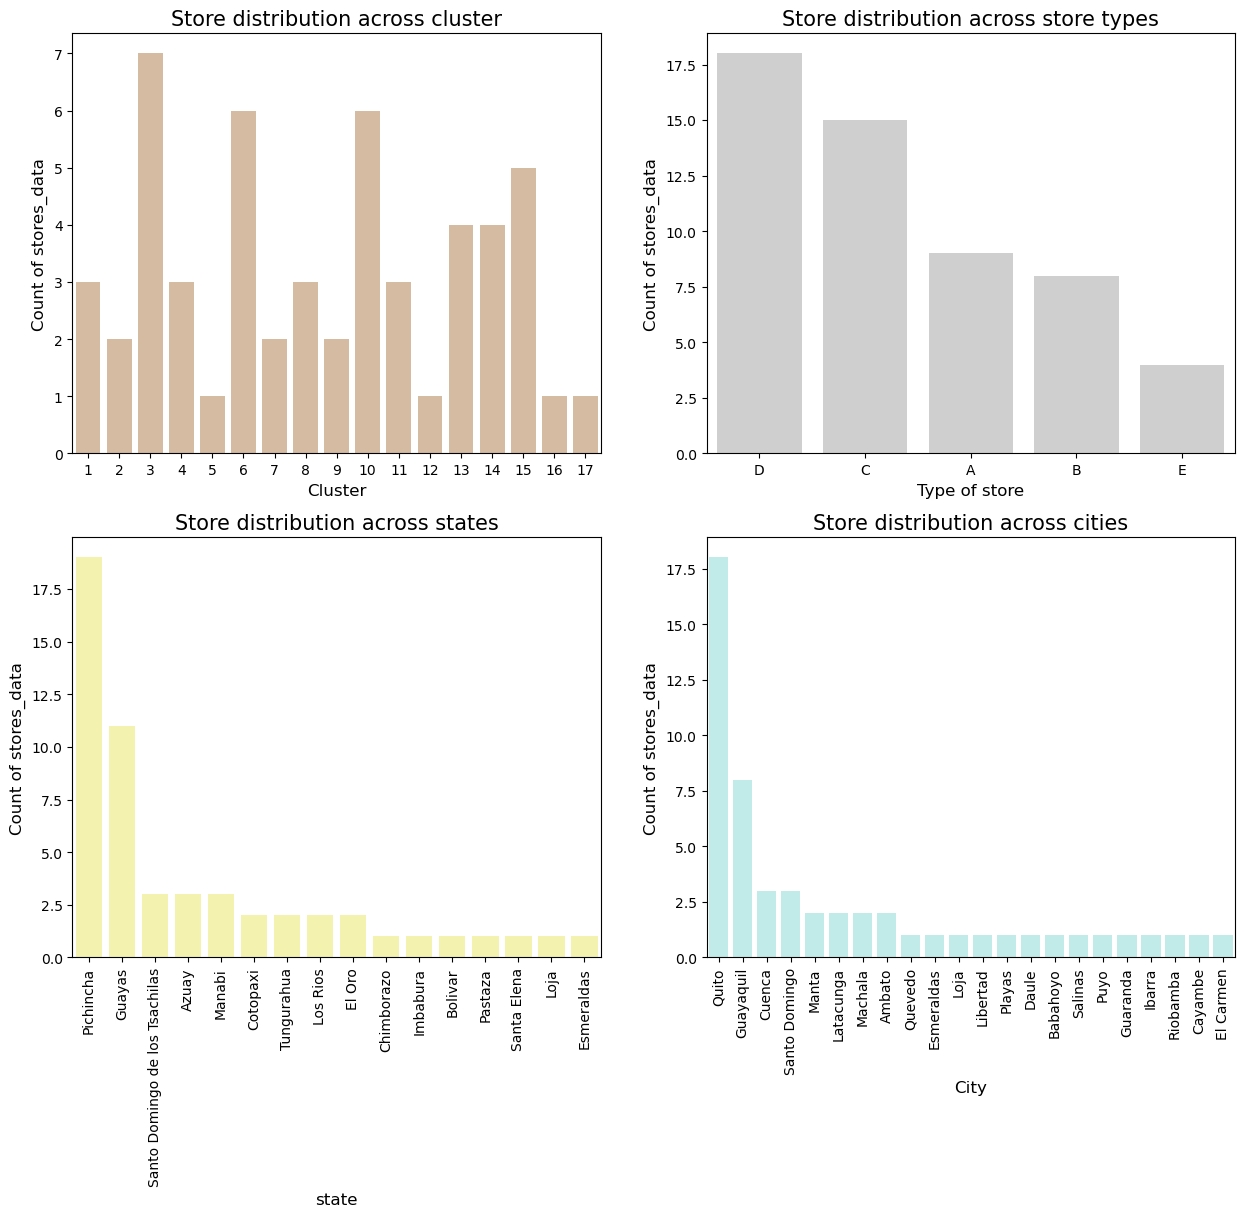

In [49]:
color = sns.color_palette("pastel")

plt.figure(figsize=(15, 12))

#Count of stores_data in different types and clusters
plt.figure(figsize=(15,12))
#row col plotnumber - 121
plt.subplot(221)
# Count of stores_data for each type 
temp = stores_data['cluster'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[5])
plt.ylabel('Count of stores_data', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.title('Store distribution across cluster', fontsize=15)

plt.subplot(222)
# Count of stores_data for each type 
temp = stores_data['type'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[7])
plt.ylabel('Count of stores_data', fontsize=12)
plt.xlabel('Type of store', fontsize=12)
plt.title('Store distribution across store types', fontsize=15)

plt.subplot(223)
# Count of stores_data for each type 
temp = stores_data['state'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[8])
plt.ylabel('Count of stores_data', fontsize=12)
plt.xlabel('state', fontsize=12)
plt.title('Store distribution across states', fontsize=15)
plt.xticks(rotation='vertical')

plt.subplot(224)
# Count of stores_data for each type 
temp = stores_data['city'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[9])
plt.ylabel('Count of stores_data', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Store distribution across cities', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

***trans_data***

In [50]:
trans_data.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [51]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


date is an object. Let change to datetime datatype

In [52]:
trans_data['date'] = pd.to_datetime(trans_data['date'])


trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


Transactions by Store Number

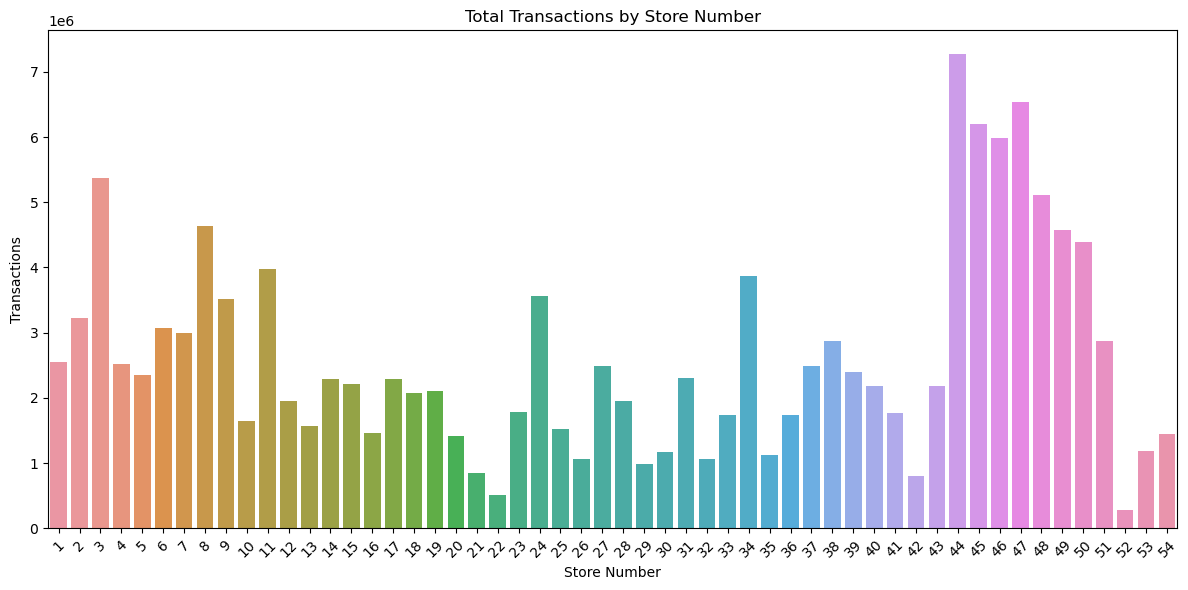

In [53]:
plt.figure(figsize=(12, 6))

# Group transactions by store number and calculate the total transactions for each store
store_transactions = trans_data.groupby('store_nbr')['transactions'].sum().reset_index()

# Plot transactions for each store number
sns.barplot(x='store_nbr', y='transactions', data=store_transactions)

plt.xlabel('Store Number')
plt.ylabel('Transactions')
plt.title('Total Transactions by Store Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

store number 44 is the one with most transactions while store number 52 is the one with low transactions.

Transactions Over date

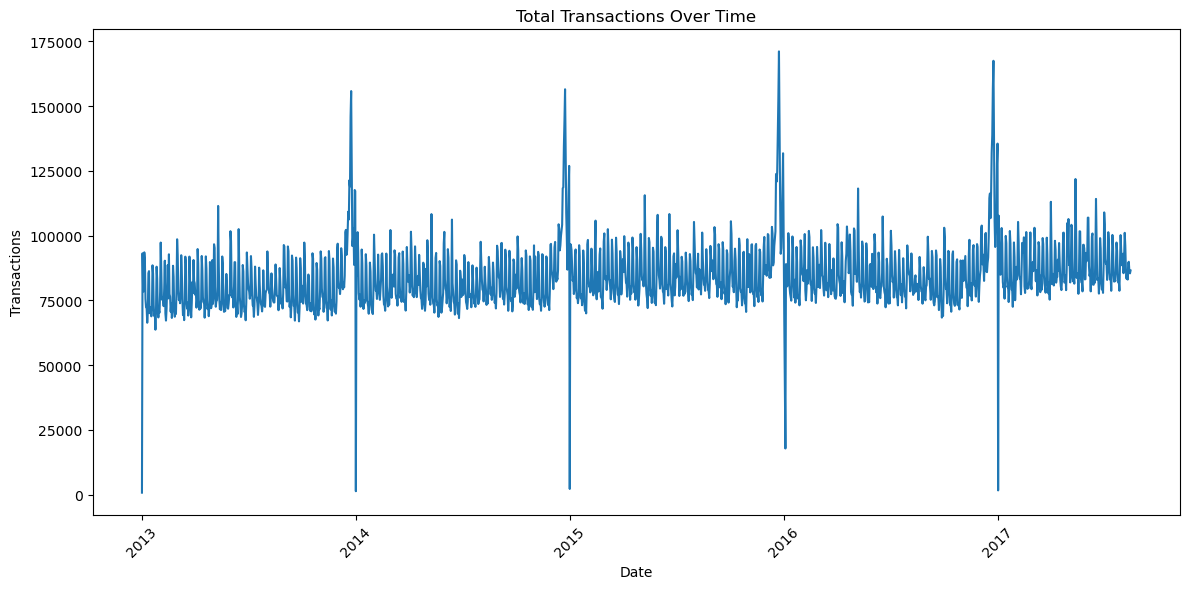

In [54]:
plt.figure(figsize=(12, 6))

# Group transactions by date and calculate the total transactions for each day
date_transactions = trans_data.groupby('date')['transactions'].sum().reset_index()

# Plot transactions over time
sns.lineplot(x='date', y='transactions', data=date_transactions)

plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Total Transactions Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**More transactions are made at the end of year (Maybe it's because of Chrismas), and very low transactions at the beginning of the year and we observe that sales really soar during the end of the year possibly due to the Navidad holiday and festivities and plummet again during the first week of the year. There's also a slight peak during the month of April, May , June. The sales for the rest of the year just oscillate between high and low. We can observe a seasonality at play.**.

***hol_events***

In [55]:
hol_events.head()

Unnamed: 0        date     type    locale locale_name  \
0           0  2012-03-02  Holiday     Local       Manta   
1           1  2012-04-01  Holiday  Regional    Cotopaxi   
2           2  2012-04-12  Holiday     Local      Cuenca   
3           3  2012-04-14  Holiday     Local    Libertad   
4           4  2012-04-21  Holiday     Local    Riobamba   

                     description  transferred  
0             Fundacion de Manta        False  
1  Provincializacion de Cotopaxi        False  
2            Fundacion de Cuenca        False  
3      Cantonizacion de Libertad        False  
4      Cantonizacion de Riobamba        False

In [56]:
hol_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   350 non-null    int64 
 1   date         350 non-null    object
 2   type         350 non-null    object
 3   locale       350 non-null    object
 4   locale_name  350 non-null    object
 5   description  350 non-null    object
 6   transferred  350 non-null    bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 16.9+ KB


date is an object. Let change to datetime datatype

In [57]:
hol_events['date'] = pd.to_datetime(hol_events['date'])


hol_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   350 non-null    int64         
 1   date         350 non-null    datetime64[ns]
 2   type         350 non-null    object        
 3   locale       350 non-null    object        
 4   locale_name  350 non-null    object        
 5   description  350 non-null    object        
 6   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 16.9+ KB


Transferred dates by Year

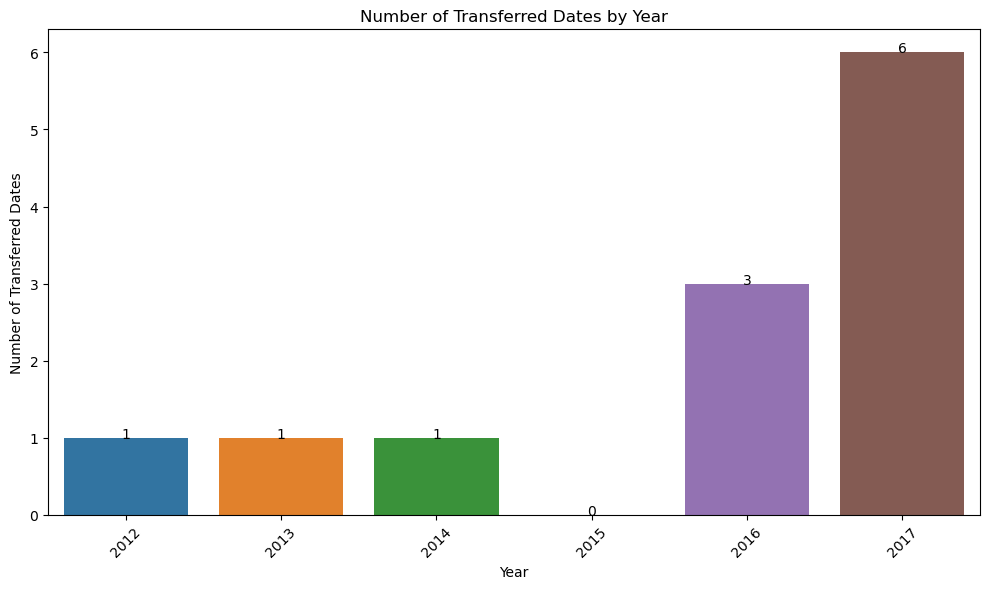

In [58]:
plt.figure(figsize=(10, 6))

# Extract the year from the 'date' column
hol_events['year'] = hol_events['date'].dt.year

# Group transferred data by year and count the number of transferred dates for each year
transferred_by_year = hol_events.groupby('year')['transferred'].sum().reset_index()

# Plot the number of transferred dates by year
sns.barplot(x='year', y='transferred', data=transferred_by_year)

plt.xlabel('Year')
plt.ylabel('Number of Transferred Dates')
plt.title('Number of Transferred Dates by Year')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with the actual numbers
for index, row in transferred_by_year.iterrows():
    plt.text(row.name, row.transferred, str(row.transferred), color='black', ha="center")

plt.show()

Holidays Distribution by Locale

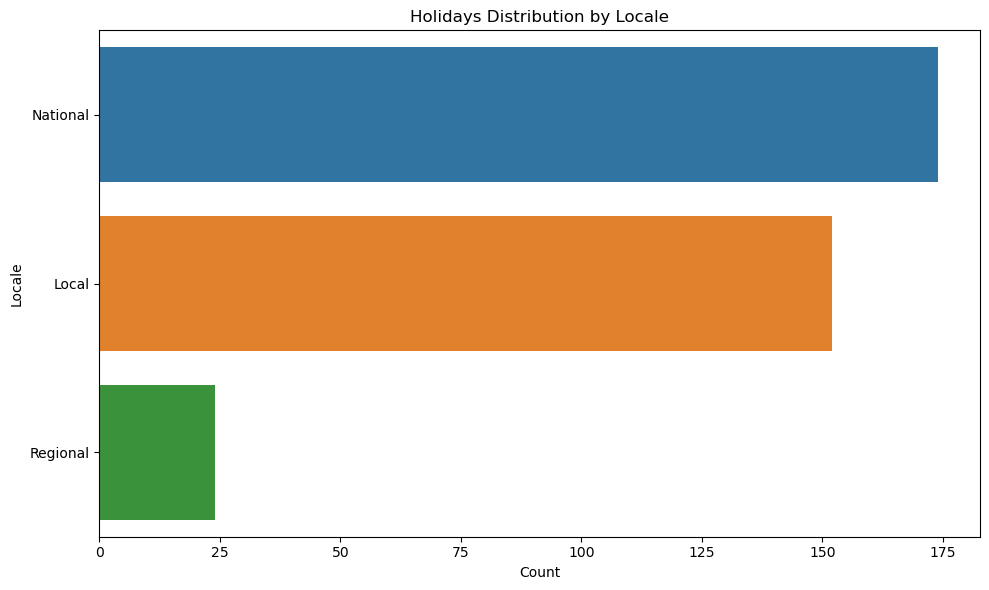

In [59]:
plt.figure(figsize=(10, 6))

# Group holidays data by locale and count the occurrences of each locale
holidays_by_locale = hol_events['locale'].value_counts().reset_index()

# Rename columns for clarity
holidays_by_locale.columns = ['locale', 'count']

# Plot the distribution of holidays by locale
sns.set_palette("tab10")  # Set color palette
sns.barplot(x='count', y='locale', data=holidays_by_locale)

plt.xlabel('Count')
plt.ylabel('Locale')
plt.title('Holidays Distribution by Locale')
plt.tight_layout()
plt.show()

Holidays Distribution by Locale Name

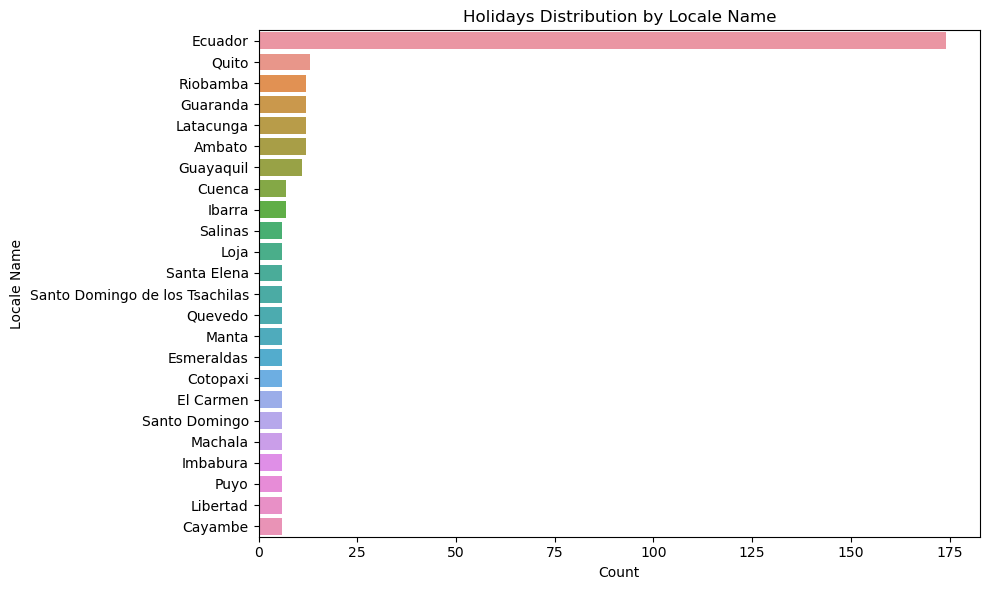

In [60]:
plt.figure(figsize=(10, 6))

# Group holidays data by locale_name and count the occurrences of each locale_name
holidays_by_locale_name = hol_events['locale_name'].value_counts().reset_index()

# Rename columns for clarity
holidays_by_locale_name.columns = ['locale_name', 'count']

# Plot the distribution of holidays by locale_name
sns.set_palette("tab10")  # Set color palette
sns.barplot(x='count', y='locale_name', data=holidays_by_locale_name)

plt.xlabel('Count')
plt.ylabel('Locale Name')
plt.title('Holidays Distribution by Locale Name')
plt.tight_layout()
plt.show()

Holidays Distribution by Type

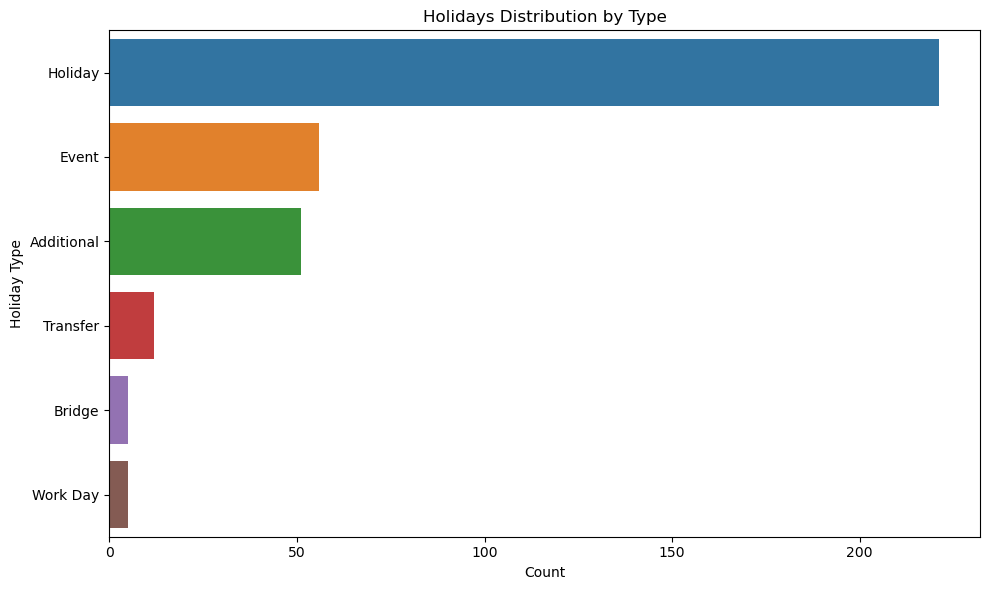

In [61]:
plt.figure(figsize=(10, 6))

# Group holidays data by type and count the occurrences of each type
holidays_by_type = hol_events['type'].value_counts().reset_index()

# Rename columns for clarity
holidays_by_type.columns = ['type', 'count']

# Plot the distribution of holidays by type
sns.set_palette("tab10")  # Set color palette
sns.barplot(x='count', y='type', data=holidays_by_type)

plt.xlabel('Count')
plt.ylabel('Holiday Type')
plt.title('Holidays Distribution by Type')
plt.tight_layout()
plt.show()

Holiday Types Distribution by Year

<Figure size 1200x600 with 0 Axes>

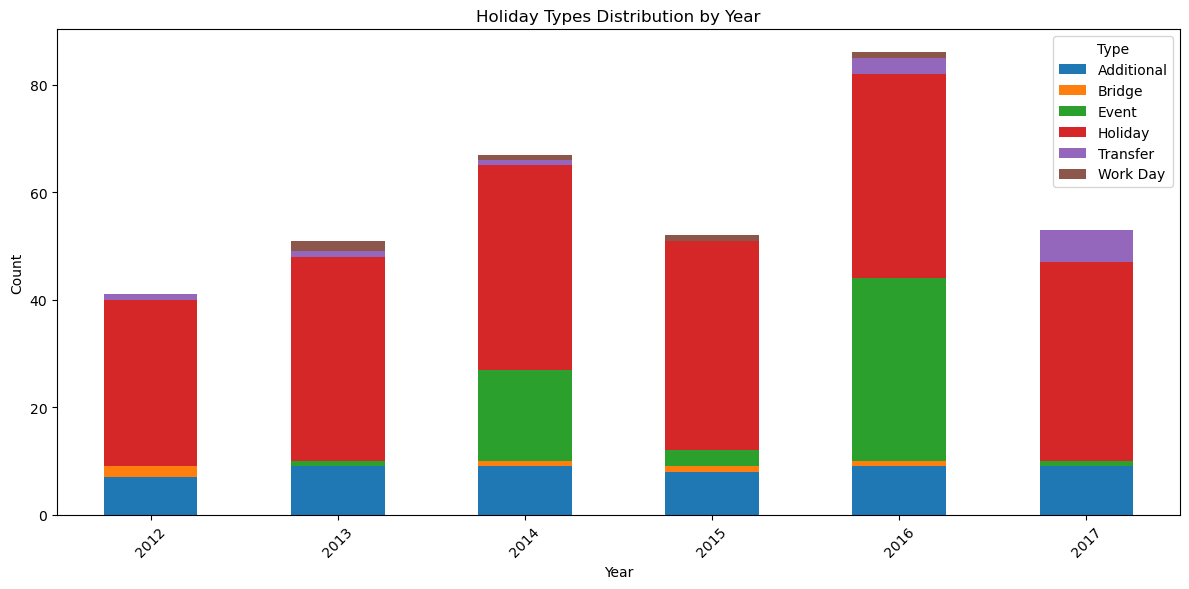

In [62]:
plt.figure(figsize=(12, 6))

# Extract the year from the 'date' column
hol_events['year'] =hol_events['date'].dt.year

# Group holidays data by year and type, then count the occurrences of each type in each year
holidays_by_year_type =hol_events.groupby(['year', 'type'])['type'].count().unstack().reset_index()

# Set the year column as the index for proper plotting
holidays_by_year_type.set_index('year', inplace=True)

# Plot the distribution of holiday types by year
sns.set_palette("tab10")  # Set color palette
holidays_by_year_type.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Holiday Types Distribution by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Type')
plt.show()

***test_data***

In [63]:
test_data.head()

id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

In [64]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


Let change date into date time.

In [65]:
test_data['date'] = pd.to_datetime(test_data['date'])


test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [66]:
sample_submission.head()

id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0

In [67]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 160.3+ MB


In [69]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  54 non-null     int64 
 1   store_nbr   54 non-null     int64 
 2   city        54 non-null     object
 3   state       54 non-null     object
 4   type        54 non-null     object
 5   cluster     54 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.7+ KB


In [70]:
# rename to easily identity columns after merging

stores_data.rename(columns={'city': 'store_city', 'state':'store_state',
                       'cluster':'store_cluster', 'type':'store_type'}, inplace=True)
hol_events.rename(columns={'type':'holiday_type',  
                               'description':'holiday_description'}, inplace=True)
oil_data.rename(columns={'dcoilwtico':'oil_price'}, inplace=True)

**Merge datasets**

- We merged the data set for improving the data Quality and to enrich context and insights and also have a more complete and holistic view and bahaviour on sales and other features in our data set.

In [71]:
train = pd.merge(train_data, oil_data, on='date', how='left')

# Merge the 'train' DataFrame (which now includes the 'oil_price' column) with the 'oil' DataFrame again based on the 'date' column using a left join
test = pd.merge(test_data, oil_data, on='date', how='left')

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int64         
 7   Unnamed: 0   float64       
 8   oil_price    float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 228.9+ MB


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 160.3+ MB


In [74]:
train.head()

id       date  store_nbr      family  sales  onpromotion  year  Unnamed: 0  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013         0.0   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013         0.0   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013         0.0   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013         0.0   
4   4 2013-01-01          1       BOOKS    0.0            0  2013         0.0   

   oil_price  
0  93.139999  
1  93.139999  
2  93.139999  
3  93.139999  
4  93.139999

**OIL PRICE ANALYSIS**

- Let observe the trend in oil prices over time

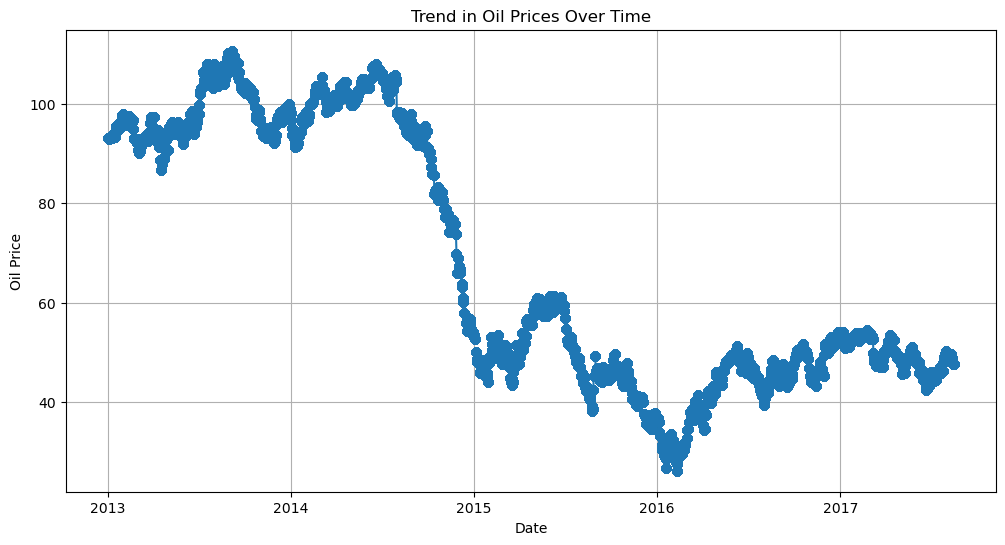

In [75]:
# Create a line plot to visualize the trend in oil prices
plt.figure(figsize=(12, 6))
plt.plot(train['date'], train['oil_price'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Trend in Oil Prices Over Time')
plt.grid(True)

plt.show()

- Understanding these trends and factors is crucial for businesses, governments, and investors who are directly or indirectly affected by oil price movements. It's important to note that predicting future oil price trends is challenging due to the multitude of factors at play, and prices can be influenced by unexpected events. AS we seen for this case we seen that the oil price has bee decreased over time due different factors such as unexpected events, etc.

+ As we seen there was a decreasing trend in oil price from Jan 2015 to Jul 2017 and the oil price is in cyclical and subjected to fluctuactions dues to varius factors either events or decrease of customers.

In [76]:
test.head()

id       date  store_nbr      family  onpromotion  Unnamed: 0  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0      1206.0   
1  3000889 2017-08-16          1   BABY CARE            0      1206.0   
2  3000890 2017-08-16          1      BEAUTY            2      1206.0   
3  3000891 2017-08-16          1   BEVERAGES           20      1206.0   
4  3000892 2017-08-16          1       BOOKS            0      1206.0   

   oil_price  
0  46.799999  
1  46.799999  
2  46.799999  
3  46.799999  
4  46.799999

In [77]:
## Store -> train, test
train =pd.merge(train,stores_data, on='store_nbr', how='left')
test =pd.merge(test,stores_data, on='store_nbr', how='left')

In [78]:
train.head()

id       date  store_nbr      family  sales  onpromotion  year  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013   
4   4 2013-01-01          1       BOOKS    0.0            0  2013   

   Unnamed: 0_x  oil_price  Unnamed: 0_y store_city store_state store_type  \
0           0.0  93.139999             0      Quito   Pichincha          D   
1           0.0  93.139999             0      Quito   Pichincha          D   
2           0.0  93.139999             0      Quito   Pichincha          D   
3           0.0  93.139999             0      Quito   Pichincha          D   
4           0.0  93.139999             0      Quito   Pichincha          D   

   store_cluster  
0             13  
1             13  
2             13  
3             13  
4             13

In [79]:
test.head()

id       date  store_nbr      family  onpromotion  Unnamed: 0_x  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0        1206.0   
1  3000889 2017-08-16          1   BABY CARE            0        1206.0   
2  3000890 2017-08-16          1      BEAUTY            2        1206.0   
3  3000891 2017-08-16          1   BEVERAGES           20        1206.0   
4  3000892 2017-08-16          1       BOOKS            0        1206.0   

   oil_price  Unnamed: 0_y store_city store_state store_type  store_cluster  
0  46.799999             0      Quito   Pichincha          D             13  
1  46.799999             0      Quito   Pichincha          D             13  
2  46.799999             0      Quito   Pichincha          D             13  
3  46.799999             0      Quito   Pichincha          D             13  
4  46.799999             0      Quito   Pichincha          D             13

In [80]:
train.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
year                  0
Unnamed: 0_x     857142
oil_price        857142
Unnamed: 0_y          0
store_city            0
store_state           0
store_type            0
store_cluster         0
dtype: int64

In [81]:
test.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
Unnamed: 0_x     7128
oil_price        7128
Unnamed: 0_y        0
store_city          0
store_state         0
store_type          0
store_cluster       0
dtype: int64

In [82]:
trans_data.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [83]:
train.head()

id       date  store_nbr      family  sales  onpromotion  year  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013   
4   4 2013-01-01          1       BOOKS    0.0            0  2013   

   Unnamed: 0_x  oil_price  Unnamed: 0_y store_city store_state store_type  \
0           0.0  93.139999             0      Quito   Pichincha          D   
1           0.0  93.139999             0      Quito   Pichincha          D   
2           0.0  93.139999             0      Quito   Pichincha          D   
3           0.0  93.139999             0      Quito   Pichincha          D   
4           0.0  93.139999             0      Quito   Pichincha          D   

   store_cluster  
0             13  
1             13  
2             13  
3             13  
4             13

In [84]:
hol_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           350 non-null    int64         
 1   date                 350 non-null    datetime64[ns]
 2   holiday_type         350 non-null    object        
 3   locale               350 non-null    object        
 4   locale_name          350 non-null    object        
 5   holiday_description  350 non-null    object        
 6   transferred          350 non-null    bool          
 7   year                 350 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 19.6+ KB


In [85]:
train =pd.merge(train, hol_events, on='date', how='left')

test = pd.merge(test, hol_events, on='date', how='left')

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id                   int64         
 1   date                 datetime64[ns]
 2   store_nbr            int64         
 3   family               object        
 4   sales                float64       
 5   onpromotion          int64         
 6   year_x               int64         
 7   Unnamed: 0_x         float64       
 8   oil_price            float64       
 9   Unnamed: 0_y         int64         
 10  store_city           object        
 11  store_state          object        
 12  store_type           object        
 13  store_cluster        int64         
 14  Unnamed: 0           float64       
 15  holiday_type         object        
 16  locale               object        
 17  locale_name          object        
 18  holiday_description  object        
 19  transferred          

In [87]:
train.isnull().sum()

id                           0
date                         0
store_nbr                    0
family                       0
sales                        0
onpromotion                  0
year_x                       0
Unnamed: 0_x            878526
oil_price               878526
Unnamed: 0_y                 0
store_city                   0
store_state                  0
store_type                   0
store_cluster                0
Unnamed: 0             2551824
holiday_type           2551824
locale                 2551824
locale_name            2551824
holiday_description    2551824
transferred            2551824
year_y                 2551824
dtype: int64

In [88]:
train.head()

id       date  store_nbr      family  sales  onpromotion  year_x  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0    2013   
1   1 2013-01-01          1   BABY CARE    0.0            0    2013   
2   2 2013-01-01          1      BEAUTY    0.0            0    2013   
3   3 2013-01-01          1   BEVERAGES    0.0            0    2013   
4   4 2013-01-01          1       BOOKS    0.0            0    2013   

   Unnamed: 0_x  oil_price  Unnamed: 0_y  ... store_state store_type  \
0           0.0  93.139999             0  ...   Pichincha          D   
1           0.0  93.139999             0  ...   Pichincha          D   
2           0.0  93.139999             0  ...   Pichincha          D   
3           0.0  93.139999             0  ...   Pichincha          D   
4           0.0  93.139999             0  ...   Pichincha          D   

  store_cluster  Unnamed: 0  holiday_type    locale locale_name  \
0            13        41.0       Holiday  National     Ecuador   
1            13        41.0       Holiday  National     Ecuador   
2            13        41.0       Holiday  National     Ecuador   
3            13        41.0       Holiday  National     Ecuador   
4            13        41.0       Holiday  National     Ecuador   

  holiday_description transferred  year_y  
0  Primer dia del ano       False  2013.0  
1  Primer dia del ano       False  2013.0  
2  Primer dia del ano       False  2013.0  
3  Primer dia del ano       False  2013.0  
4  Primer dia del ano       False  2013.0  

[5 rows x 21 columns]

In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   28512 non-null  int64         
 1   date                 28512 non-null  datetime64[ns]
 2   store_nbr            28512 non-null  int64         
 3   family               28512 non-null  object        
 4   onpromotion          28512 non-null  int64         
 5   Unnamed: 0_x         21384 non-null  float64       
 6   oil_price            21384 non-null  float64       
 7   Unnamed: 0_y         28512 non-null  int64         
 8   store_city           28512 non-null  object        
 9   store_state          28512 non-null  object        
 10  store_type           28512 non-null  object        
 11  store_cluster        28512 non-null  int64         
 12  Unnamed: 0           1782 non-null   float64       
 13  holiday_type         1782 non-n

In [90]:
test.isna().sum()

id                         0
date                       0
store_nbr                  0
family                     0
onpromotion                0
Unnamed: 0_x            7128
oil_price               7128
Unnamed: 0_y               0
store_city                 0
store_state                0
store_type                 0
store_cluster              0
Unnamed: 0             26730
holiday_type           26730
locale                 26730
locale_name            26730
holiday_description    26730
transferred            26730
year                   26730
dtype: int64

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   28512 non-null  int64         
 1   date                 28512 non-null  datetime64[ns]
 2   store_nbr            28512 non-null  int64         
 3   family               28512 non-null  object        
 4   onpromotion          28512 non-null  int64         
 5   Unnamed: 0_x         21384 non-null  float64       
 6   oil_price            21384 non-null  float64       
 7   Unnamed: 0_y         28512 non-null  int64         
 8   store_city           28512 non-null  object        
 9   store_state          28512 non-null  object        
 10  store_type           28512 non-null  object        
 11  store_cluster        28512 non-null  int64         
 12  Unnamed: 0           1782 non-null   float64       
 13  holiday_type         1782 non-n

In [92]:
train['oil_price'].fillna(method='ffill', inplace=True)

train['holiday_type'].fillna('No Event', inplace=True)

train['locale'].fillna('N/A', inplace=True)

train['locale_name'].fillna('N/A', inplace=True)

train['holiday_description'].fillna('N/A', inplace=True)

train['transferred'].fillna('N/A', inplace=True)
train['year_y'].fillna('N/A', inplace=True)

In [93]:
train.isna().sum()

id                           0
date                         0
store_nbr                    0
family                       0
sales                        0
onpromotion                  0
year_x                       0
Unnamed: 0_x            878526
oil_price                    0
Unnamed: 0_y                 0
store_city                   0
store_state                  0
store_type                   0
store_cluster                0
Unnamed: 0             2551824
holiday_type                 0
locale                       0
locale_name                  0
holiday_description          0
transferred                  0
year_y                       0
dtype: int64

In [94]:
test['oil_price'].fillna(method='ffill', inplace=True)

test['holiday_type'].fillna('No Event', inplace=True)

test['locale'].fillna('N/A', inplace=True)

test['locale_name'].fillna('N/A', inplace=True)

test['holiday_description'].fillna('N/A', inplace=True)

test['transferred'].fillna('N/A', inplace=True)
test['year'].fillna('N/A', inplace=True)

In [95]:
test.isna().sum()

id                         0
date                       0
store_nbr                  0
family                     0
onpromotion                0
Unnamed: 0_x            7128
oil_price                  0
Unnamed: 0_y               0
store_city                 0
store_state                0
store_type                 0
store_cluster              0
Unnamed: 0             26730
holiday_type               0
locale                     0
locale_name                0
holiday_description        0
transferred                0
year                       0
dtype: int64

#### Feature selection

In [96]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year_x',
       'Unnamed: 0_x', 'oil_price', 'Unnamed: 0_y', 'store_city',
       'store_state', 'store_type', 'store_cluster', 'Unnamed: 0',
       'holiday_type', 'locale', 'locale_name', 'holiday_description',
       'transferred', 'year_y'],
      dtype='object')

In [97]:
train.drop([ 'id', 'store_state', 'store_type', 'store_cluster',
       'locale', 'locale_name','Unnamed: 0','Unnamed: 0_x','Unnamed: 0_y','holiday_description',
       'transferred', 'year_y', 'year_x'], axis=1, inplace=True)

In [98]:
train.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'oil_price',
       'store_city', 'holiday_type'],
      dtype='object')

In [99]:
test.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'Unnamed: 0_x',
       'oil_price', 'Unnamed: 0_y', 'store_city', 'store_state', 'store_type',
       'store_cluster', 'Unnamed: 0', 'holiday_type', 'locale', 'locale_name',
       'holiday_description', 'transferred', 'year'],
      dtype='object')

In [100]:
test.drop([ 'id','store_state', 'store_type', 'store_cluster',
       'locale', 'locale_name','Unnamed: 0','Unnamed: 0_x','Unnamed: 0_y', 'holiday_description',
       'transferred', 'year'], axis=1, inplace=True)

In [101]:
test.columns

Index(['date', 'store_nbr', 'family', 'onpromotion', 'oil_price', 'store_city',
       'holiday_type'],
      dtype='object')

### handling missing values


In [102]:
train.isnull().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
oil_price       0
store_city      0
holiday_type    0
dtype: int64

In [103]:
test.isnull().sum()

date            0
store_nbr       0
family          0
onpromotion     0
oil_price       0
store_city      0
holiday_type    0
dtype: int64

No missing values.

### Handling outliers

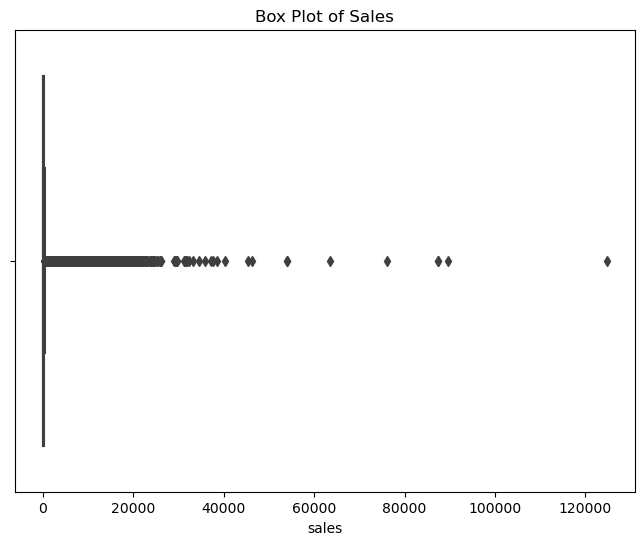

Number of outliers in 'sales' column: 455506


In [104]:
plt.figure(figsize=(8, 6))

# Create a box plot for the 'sales' column
sns.boxplot(x=train['sales'])
plt.title('Box Plot of Sales')
plt.show()

# Calculate the IQR for the 'sales' column
Q1 = train['sales'].quantile(0.25)
Q3 = train['sales'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (train['sales'] < (Q1 - 1.5 * IQR)) | (train['sales'] > (Q3 + 1.5 * IQR))

# Count the number of outliers
outlier_count = outliers.sum()

print("Number of outliers in 'sales' column:", outlier_count)

Winsorization:

Instead of removing outliers, consider winsorizing the data. Winsorization involves replacing extreme values with less extreme values, effectively capping the outliers. This reduces the influence of outliers while retaining their presence in the dataset.


In [105]:
# Define the lower and upper percentile thresholds
lower_percentile = 5  # You can adjust this threshold
upper_percentile = 95  # You can adjust this threshold

# Calculate the lower and upper percentile values
lower_threshold = np.percentile(train['sales'], lower_percentile)
upper_threshold = np.percentile(train['sales'], upper_percentile)

# Apply Winsorization to the 'feature' column
train['feature_winsorized'] = np.where(train['sales'] < lower_threshold, lower_threshold, train['sales'])
train['feature_winsorized'] = np.where(train['feature_winsorized'] > upper_threshold, upper_threshold, train['feature_winsorized'])

In [106]:
train.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'oil_price',
       'store_city', 'holiday_type', 'feature_winsorized'],
      dtype='object')

### One-hot-encoding

In [107]:
print(train.columns)  # Print the column names before dropping

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'oil_price',
       'store_city', 'holiday_type', 'feature_winsorized'],
      dtype='object')


In [108]:
print(test.columns)

Index(['date', 'store_nbr', 'family', 'onpromotion', 'oil_price', 'store_city',
       'holiday_type'],
      dtype='object')


In [109]:
cat_col = ['family','store_city','holiday_type']


train = pd.get_dummies(train, columns=cat_col)


In [110]:
tescat_col = ['family','store_city','holiday_type']


testencoded = pd.get_dummies(test, columns=tescat_col)

In [111]:
train .head()

date  store_nbr  sales  onpromotion  oil_price  feature_winsorized  \
0 2013-01-01          1    0.0            0  93.139999                 0.0   
1 2013-01-01          1    0.0            0  93.139999                 0.0   
2 2013-01-01          1    0.0            0  93.139999                 0.0   
3 2013-01-01          1    0.0            0  93.139999                 0.0   
4 2013-01-01          1    0.0            0  93.139999                 0.0   

   family_AUTOMOTIVE  family_BABY CARE  family_BEAUTY  family_BEVERAGES  ...  \
0                  1                 0              0                 0  ...   
1                  0                 1              0                 0  ...   
2                  0                 0              1                 0  ...   
3                  0                 0              0                 1  ...   
4                  0                 0              0                 0  ...   

   store_city_Riobamba  store_city_Salinas  store_city_Santo Domingo  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    0                   0                         0   
3                    0                   0                         0   
4                    0                   0                         0   

   holiday_type_Additional  holiday_type_Bridge  holiday_type_Event  \
0                        0                    0                   0   
1                        0                    0                   0   
2                        0                    0                   0   
3                        0                    0                   0   
4                        0                    0                   0   

   holiday_type_Holiday  holiday_type_No Event  holiday_type_Transfer  \
0                     1                      0                      0   
1                     1                      0                      0   
2                     1                      0                      0   
3                     1                      0                      0   
4                     1                      0                      0   

   holiday_type_Work Day  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 68 columns]

In [112]:
testencoded.head()

date  store_nbr  onpromotion  oil_price  family_AUTOMOTIVE  \
0 2017-08-16          1            0  46.799999                  1   
1 2017-08-16          1            0  46.799999                  0   
2 2017-08-16          1            2  46.799999                  0   
3 2017-08-16          1           20  46.799999                  0   
4 2017-08-16          1            0  46.799999                  0   

   family_BABY CARE  family_BEAUTY  family_BEVERAGES  family_BOOKS  \
0                 0              0                 0             0   
1                 1              0                 0             0   
2                 0              1                 0             0   
3                 0              0                 1             0   
4                 0              0                 0             1   

   family_BREAD/BAKERY  ...  store_city_Manta  store_city_Playas  \
0                    0  ...                 0                  0   
1                    0  ...                 0                  0   
2                    0  ...                 0                  0   
3                    0  ...                 0                  0   
4                    0  ...                 0                  0   

   store_city_Puyo  store_city_Quevedo  store_city_Quito  store_city_Riobamba  \
0                0                   0                 1                    0   
1                0                   0                 1                    0   
2                0                   0                 1                    0   
3                0                   0                 1                    0   
4                0                   0                 1                    0   

   store_city_Salinas  store_city_Santo Domingo  holiday_type_Holiday  \
0                   0                         0                     0   
1                   0                         0                     0   
2                   0                         0                     0   
3                   0                         0                     0   
4                   0                         0                     0   

   holiday_type_No Event  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  

[5 rows x 61 columns]

### Feature scaling

In [113]:
num_col = ['store_nbr', 'sales', 'onpromotion', 'oil_price',
       'feature_winsorized', 'year']

In [114]:
tesnum_col = ['store_nbr', 'onpromotion', 'oil_price', 'year']

In [115]:

minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(train,col):
  for i in col:
    arr = train[i]
    arr = np.array(arr)
    train[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return train

In [116]:
tesminmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(testencoded,col):
  for i in col:
    arr = testencoded[i]
    arr = np.array(arr)
    testencoded[i] = tesminmax_scale.fit_transform(arr.reshape(len(arr),1))
  return testencoded

In [117]:

train.head()

date  store_nbr  sales  onpromotion  oil_price  feature_winsorized  \
0 2013-01-01          1    0.0            0  93.139999                 0.0   
1 2013-01-01          1    0.0            0  93.139999                 0.0   
2 2013-01-01          1    0.0            0  93.139999                 0.0   
3 2013-01-01          1    0.0            0  93.139999                 0.0   
4 2013-01-01          1    0.0            0  93.139999                 0.0   

   family_AUTOMOTIVE  family_BABY CARE  family_BEAUTY  family_BEVERAGES  ...  \
0                  1                 0              0                 0  ...   
1                  0                 1              0                 0  ...   
2                  0                 0              1                 0  ...   
3                  0                 0              0                 1  ...   
4                  0                 0              0                 0  ...   

   store_city_Riobamba  store_city_Salinas  store_city_Santo Domingo  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    0                   0                         0   
3                    0                   0                         0   
4                    0                   0                         0   

   holiday_type_Additional  holiday_type_Bridge  holiday_type_Event  \
0                        0                    0                   0   
1                        0                    0                   0   
2                        0                    0                   0   
3                        0                    0                   0   
4                        0                    0                   0   

   holiday_type_Holiday  holiday_type_No Event  holiday_type_Transfer  \
0                     1                      0                      0   
1                     1                      0                      0   
2                     1                      0                      0   
3                     1                      0                      0   
4                     1                      0                      0   

   holiday_type_Work Day  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 68 columns]

In [118]:
test.head()

date  store_nbr      family  onpromotion  oil_price store_city  \
0 2017-08-16          1  AUTOMOTIVE            0  46.799999      Quito   
1 2017-08-16          1   BABY CARE            0  46.799999      Quito   
2 2017-08-16          1      BEAUTY            2  46.799999      Quito   
3 2017-08-16          1   BEVERAGES           20  46.799999      Quito   
4 2017-08-16          1       BOOKS            0  46.799999      Quito   

  holiday_type  
0     No Event  
1     No Event  
2     No Event  
3     No Event  
4     No Event

**Resampling** 
- Resampling is a technique used in time series analysis to change the frequency of your data, typically from a higher frequency to a lower frequency (downsampling) or from a lower frequency to a higher frequency (upsampling).
- Since we’re working with time series data, we need to convert the data into a time series format. We can do this by setting the index of the dataframe to the datetime format.

In [119]:
# Convert the 'date' column to a datetime object
train['date'] = pd.to_datetime(train['date'])

# Set the 'date' column as the index
train.set_index('date', inplace=True) 

# Resample data to weekly frequency and aggregate by taking the sum
df_resample = train.resample('D').sum()

In [120]:
# Convert the 'date' column to a datetime object
testencoded['date'] = pd.to_datetime(testencoded['date'])

# Set the 'date' column as the index
testencoded.set_index('date', inplace=True) 

# Resample data to weekly frequency and aggregate by taking the sum
test_resample = testencoded.resample('D').sum()

In [121]:
df_resample.columns

Index(['store_nbr', 'sales', 'onpromotion', 'oil_price', 'feature_winsorized',
       'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
       'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
       'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
       'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY',
       'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule'

In [122]:
test_resample.columns

Index(['store_nbr', 'onpromotion', 'oil_price', 'family_AUTOMOTIVE',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule', 'store_city_El Carmen',
       'stor

**Trend and Seasonal, and Decomposition Analysis**

Component Analysis helps us to understand the underlying patterns and structures within the data.
##### Trend Component: captures the overall direction in which the data is moving, whether it's increasing, decreasing, or remaining relatively stable over time.
##### Seasonal component: Seasonal decomposition helps in isolating these regular variations, making it easier to understand and model the impact of seasonality on the data. 
##### Residual Component: The residual component, also known as the error or noise component, captures the random fluctuations or irregularities in the time series data that cannot be explained by the trend or seasonal patterns.

Observed Component:
date
2013-01-01      2511.618999
2013-01-02    353259.417944
2013-01-03    294267.231124
2013-01-04    290671.704093
2013-01-05    346113.121229
Freq: D, Name: feature_winsorized, dtype: float64
Trend Component:
date
2013-01-01      2511.618999
2013-01-02    353259.417944
2013-01-03    294267.231124
2013-01-04    290671.704093
2013-01-05    346113.121229
Freq: D, Name: trend, dtype: float64
Seasonal Component:
date
2013-01-01    0.0
2013-01-02    0.0
2013-01-03    0.0
2013-01-04    0.0
2013-01-05    0.0
Freq: D, Name: seasonal, dtype: float64
Residual Component:
date
2013-01-01    0.0
2013-01-02    0.0
2013-01-03    0.0
2013-01-04    0.0
2013-01-05    0.0
Freq: D, Name: resid, dtype: float64


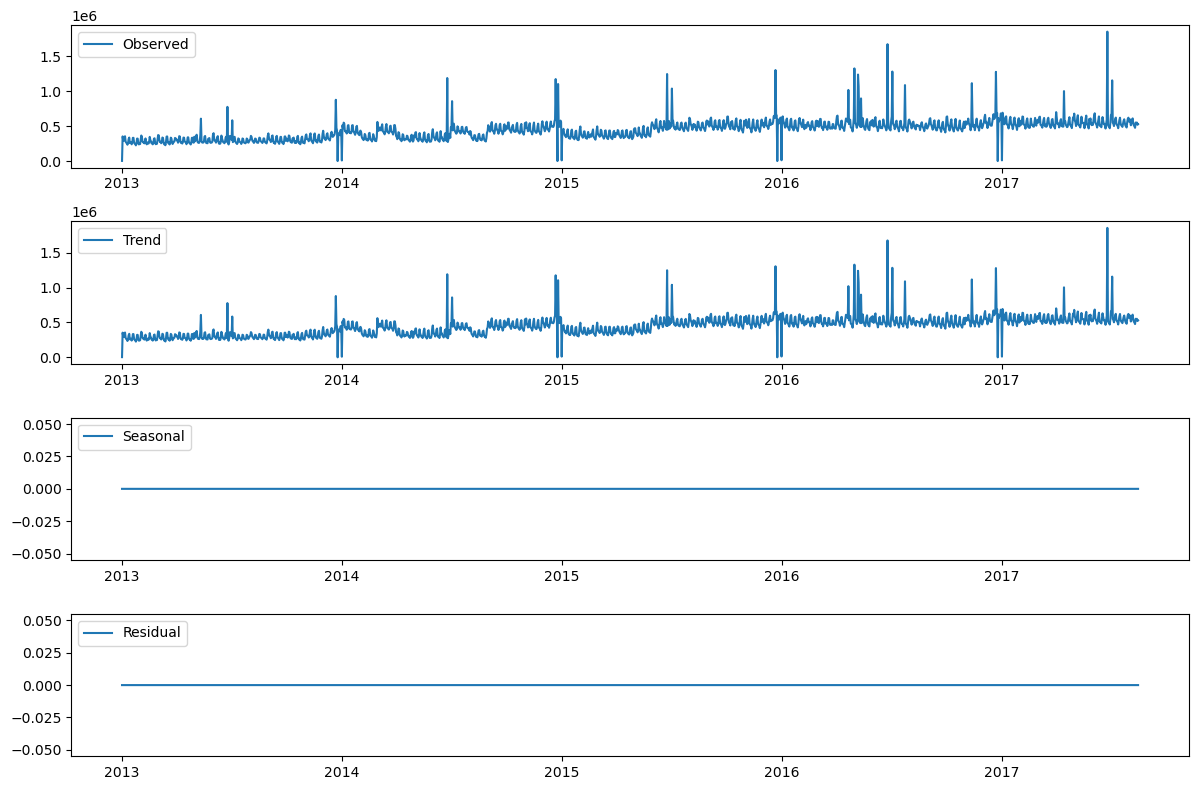

In [123]:
# Specify a monthly frequency ('W') for your data (optional, as it's already resampled)
df_resample = df_resample.asfreq('D')

# Perform seasonal decomposition
result = seasonal_decompose(df_resample['feature_winsorized'], model='additive', period=1)  # Specify a period of 1 for Weekly data

# Plot the seasonal decomposition components
plt.figure(figsize=(12, 8))

# Observed component
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
print("Observed Component:")
print(result.observed.head())  # Print the first few rows of the observed component

# Trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
print("Trend Component:")
print(result.trend.head())  # Print the first few rows of the trend component

# Seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
print("Seasonal Component:")
print(result.seasonal.head())  # Print the first few rows of the seasonal component

# Residual component
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
print("Residual Component:")
print(result.resid.head())  # Print the first few rows of the residual component

plt.tight_layout()
plt.show()

##### Autocorrelation Analysis

- ACF and PACF plots: After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. Of course, with software like Statgraphics, you could just try some different combinations of terms and see what works best. But there is a more systematic way to do this. By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

- Autocorrelation Function (ACF): P = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation) P helps adjust the line that is being fitted to forecast the series. P corresponds with MA parameter
- Partial Autocorrelation Function (PACF): D = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. D refers to the number of differencing transformations required by the time series to get stationary. D corresponds with AR parameter.
Autocorrelation plots help in detecting seasonality.

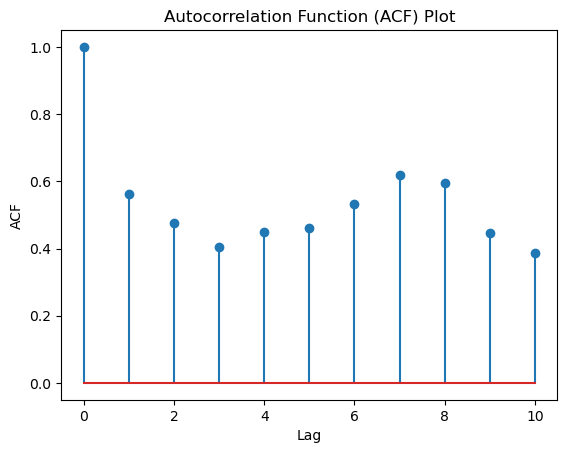

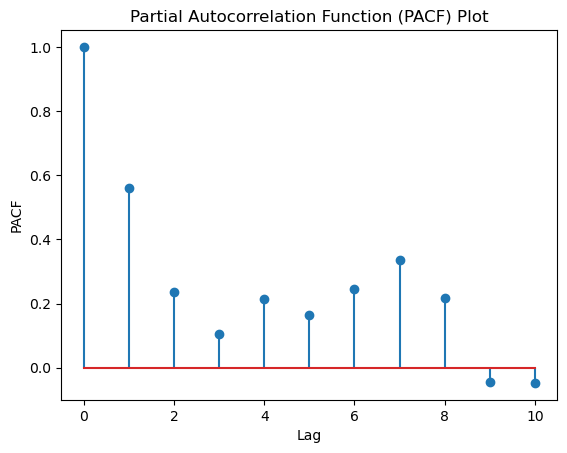

In [124]:
# Extract the time series data 
time_series = df_resample['feature_winsorized']

# Set the number of lags you want to consider in the ACF and PACF plots
lags = 10  # Adjust as needed

# Compute ACF
acf = sm.tsa.acf(time_series, nlags=lags)

# Create ACF plot
plt.stem(range(lags + 1), acf)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

# Compute PACF
pacf = sm.tsa.pacf(time_series, nlags=lags)

# Create PACF plot
plt.stem(range(lags + 1), pacf)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()
     

In [125]:
df_resample.columns

Index(['store_nbr', 'sales', 'onpromotion', 'oil_price', 'feature_winsorized',
       'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
       'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
       'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
       'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY',
       'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule'

In [126]:
#resample method automatically incluedes and interpolates for missing dates. 


daily_sales = df_resample['feature_winsorized'].resample('D').sum().reset_index(name='daily_sales').set_index('date')
df_resample['year'] = df_resample.index.year
df_resample

store_nbr          sales  onpromotion      oil_price  \
date                                                               
2013-01-01      49005    2511.618999            0  165975.478912   
2013-01-02      49005  496092.417944            0  165975.478912   
2013-01-03      49005  361461.231124            0  165672.542175   
2013-01-04      49005  354459.677093            0  165939.844894   
2013-01-05      49005  477350.121229            0  165939.844894   
...               ...            ...          ...            ...   
2017-08-11      49005  826373.722022        14179   86979.422447   
2017-08-12      49005  792630.535079         8312   86979.422447   
2017-08-13      49005  865639.677471         9283   86979.422447   
2017-08-14      49005  760922.406081         8043   84805.380272   
2017-08-15      49005  762661.935939        10605   84769.739456   

            feature_winsorized  family_AUTOMOTIVE  family_BABY CARE  \
date                                                                  
2013-01-01         2511.618999                 54                54   
2013-01-02       353259.417944                 54                54   
2013-01-03       294267.231124                 54                54   
2013-01-04       290671.704093                 54                54   
2013-01-05       346113.121229                 54                54   
...                        ...                ...               ...   
2017-08-11       552298.562022                 54                54   
2017-08-12       533327.707179                 54                54   
2017-08-13       552033.704071                 54                54   
2017-08-14       520006.375081                 54                54   
2017-08-15       528860.127939                 54                54   

            family_BEAUTY  family_BEVERAGES  family_BOOKS  ...  \
date                                                       ...   
2013-01-01             54                54            54  ...   
2013-01-02             54                54            54  ...   
2013-01-03             54                54            54  ...   
2013-01-04             54                54            54  ...   
2013-01-05             54                54            54  ...   
...                   ...               ...           ...  ...   
2017-08-11             54                54            54  ...   
2017-08-12             54                54            54  ...   
2017-08-13             54                54            54  ...   
2017-08-14             54                54            54  ...   
2017-08-15             54                54            54  ...   

            store_city_Salinas  store_city_Santo Domingo  \
date                                                       
2013-01-01                  33                        99   
2013-01-02                  33                        99   
2013-01-03                  33                        99   
2013-01-04                  33                        99   
2013-01-05                  33                        99   
...                        ...                       ...   
2017-08-11                  33                        99   
2017-08-12                  33                        99   
2017-08-13                  33                        99   
2017-08-14                  33                        99   
2017-08-15                  33                        99   

            holiday_type_Additional  holiday_type_Bridge  holiday_type_Event  \
date                                                                           
2013-01-01                        0                    0                   0   
2013-01-02                        0                    0                   0   
2013-01-03                        0                    0                   0   
2013-01-04                        0                    0                   0   
2013-01-05                        0                    0                   0   
...

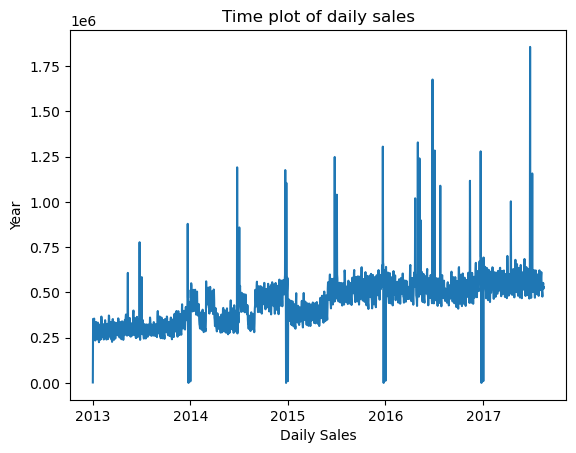

In [127]:
fig, ax = plt.subplots()

ax.plot(daily_sales.index, daily_sales.daily_sales)
ax.set_title('Time plot of daily sales')
ax.set_ylabel('Year')
ax.set_xlabel('Daily Sales');

+ There's some seasonality in the data:
    - there's a dip in prices at the start of the year
    - a rise in the middle and at the end of the year. 
+ an upward trend is also somewhat visible.

#### Moving Average Plots
+ we use MA plots to smooth out the fluctuations in our data to help us see the kind of trend, if any, we have. 
+ we'll plot by year to clearly see the trend

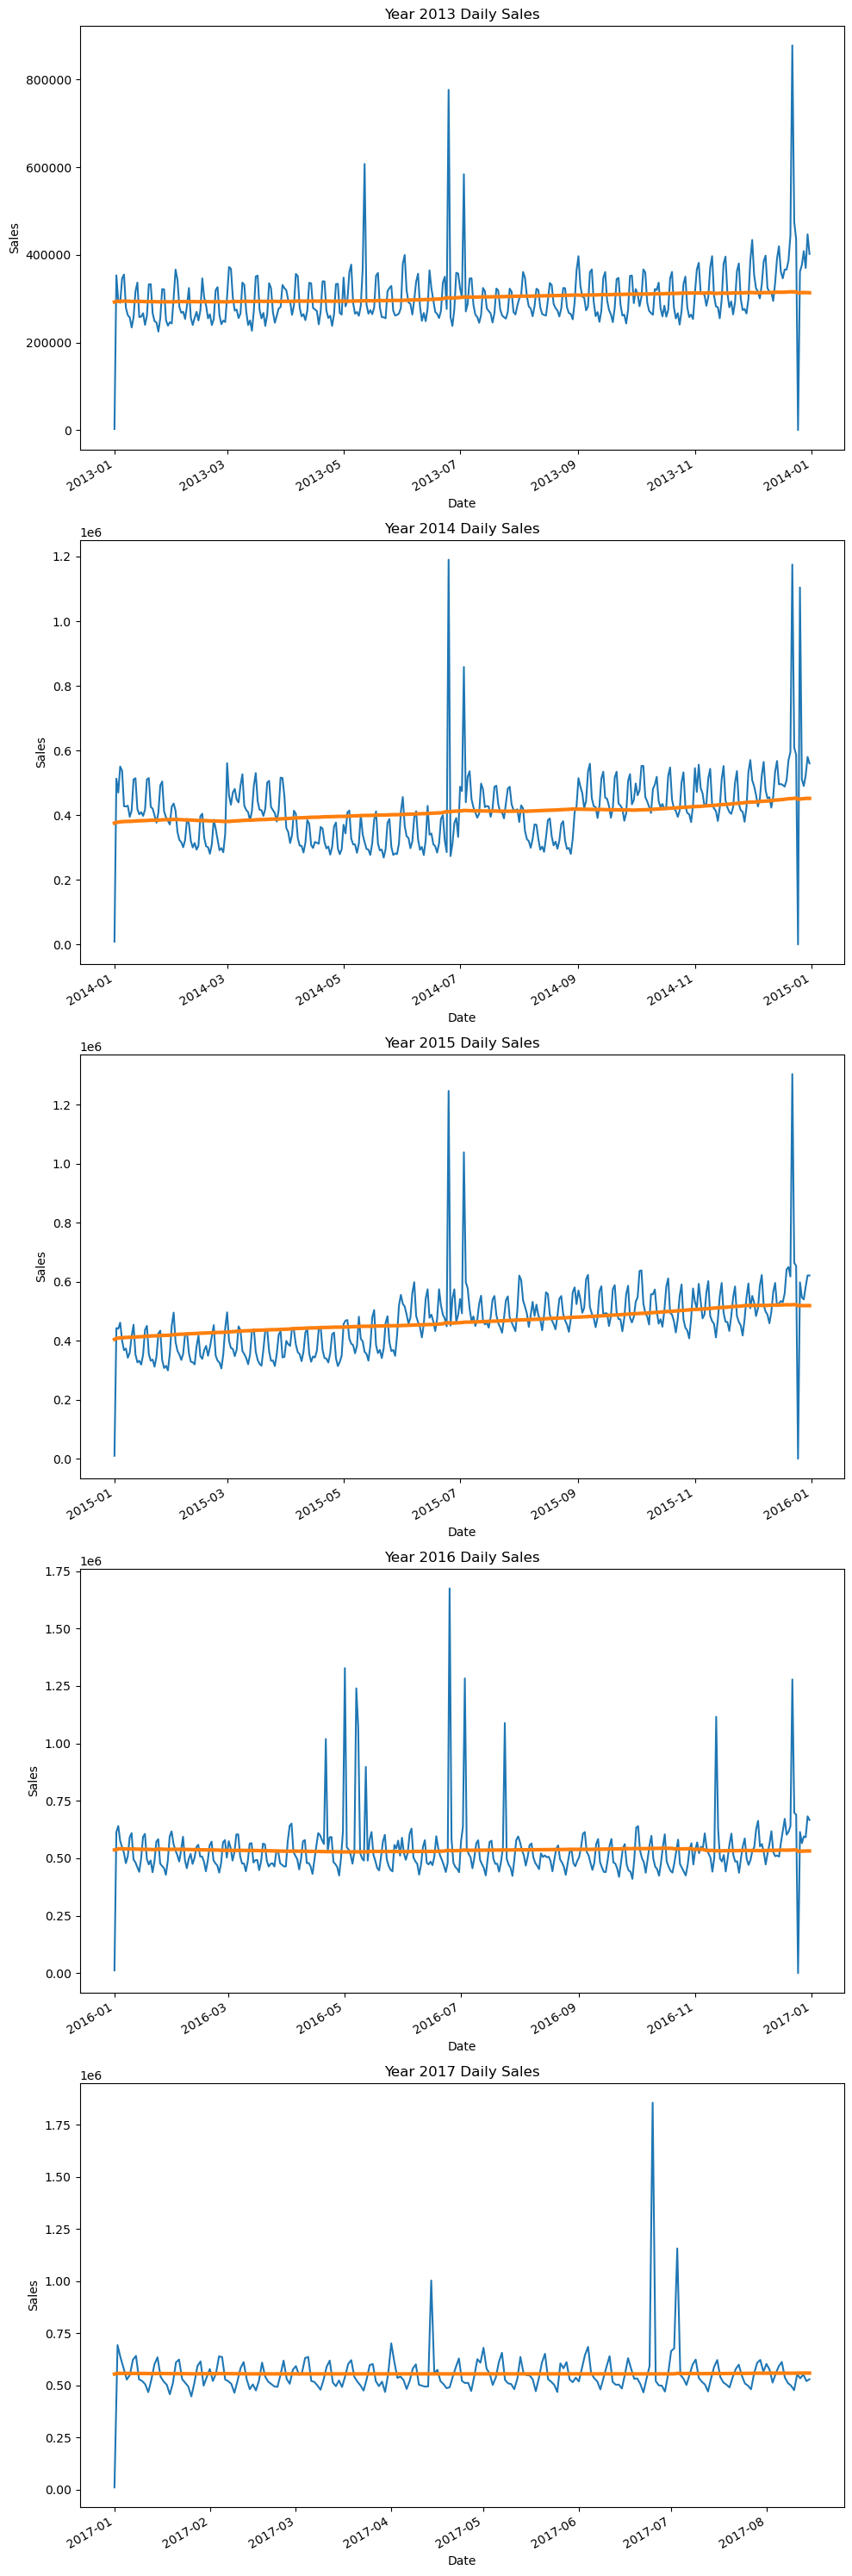

In [128]:
grouped = df_resample.groupby('year')

# Create a new figure and plot each year's daily sales on a new axis
fig, axes = plt.subplots(len(grouped), figsize=(10, 6 * len(grouped)))

for i, (year, group) in enumerate(grouped):
    ax = axes[i]
    ax.plot(group.index, group['feature_winsorized'])
    
    moving_average = group['feature_winsorized'].rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
    ).mean()        

    moving_average.plot(
    ax=ax, linewidth=3, title=" 365-Day Moving Average", legend=False
    )

    
    ax.set_title(f"Year {year} Daily Sales")
    ax.set_xlabel("Date")
    ax.set_ylabel("Sales")

plt.tight_layout()
plt.show()

<Axes: xlabel='date'>

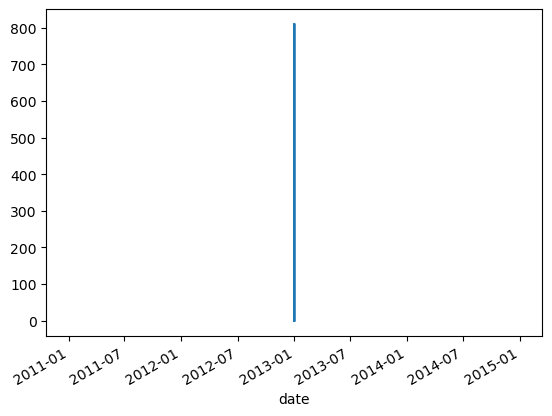

In [129]:
# visualize the values on day level 
train.loc['2013-01-01', 'sales'].plot()

In [130]:
len(train)

3054348

In [131]:
duplicate_indices = train.index[train.index.duplicated()]
print(duplicate_indices)


DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=3052664, freq=None)


In [132]:
len(train)

3054348

In [133]:
df_resample.columns

Index(['store_nbr', 'sales', 'onpromotion', 'oil_price', 'feature_winsorized',
       'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
       'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
       'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
       'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY',
       'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule'

### Data Splitted into Training,Test

In [134]:
train.columns

Index(['store_nbr', 'sales', 'onpromotion', 'oil_price', 'feature_winsorized',
       'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
       'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
       'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
       'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY',
       'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule'

In [135]:
df_resample.head()

store_nbr          sales  onpromotion      oil_price  \
date                                                               
2013-01-01      49005    2511.618999            0  165975.478912   
2013-01-02      49005  496092.417944            0  165975.478912   
2013-01-03      49005  361461.231124            0  165672.542175   
2013-01-04      49005  354459.677093            0  165939.844894   
2013-01-05      49005  477350.121229            0  165939.844894   

            feature_winsorized  family_AUTOMOTIVE  family_BABY CARE  \
date                                                                  
2013-01-01         2511.618999                 54                54   
2013-01-02       353259.417944                 54                54   
2013-01-03       294267.231124                 54                54   
2013-01-04       290671.704093                 54                54   
2013-01-05       346113.121229                 54                54   

            family_BEAUTY  family_BEVERAGES  family_BOOKS  ...  \
date                                                       ...   
2013-01-01             54                54            54  ...   
2013-01-02             54                54            54  ...   
2013-01-03             54                54            54  ...   
2013-01-04             54                54            54  ...   
2013-01-05             54                54            54  ...   

            store_city_Salinas  store_city_Santo Domingo  \
date                                                       
2013-01-01                  33                        99   
2013-01-02                  33                        99   
2013-01-03                  33                        99   
2013-01-04                  33                        99   
2013-01-05                  33                        99   

            holiday_type_Additional  holiday_type_Bridge  holiday_type_Event  \
date                                                                           
2013-01-01                        0                    0                   0   
2013-01-02                        0                    0                   0   
2013-01-03                        0                    0                   0   
2013-01-04                        0                    0                   0   
2013-01-05                        0                    0                   0   

            holiday_type_Holiday  holiday_type_No Event  \
date                                                      
2013-01-01                  1782                      0   
2013-01-02                     0                   1782   
2013-01-03                     0                   1782   
2013-01-04                     0                   1782   
2013-01-05                     0                      0   

            holiday_type_Transfer  holiday_type_Work Day  year  
date                                                            
2013-01-01                      0                      0  2013  
2013-01-02                      0                      0  2013  
2013-01-03                      0                      0  2013  
2013-01-04                      0                      0  2013  
2013-01-05                      0                   1782  2013  

[5 rows x 68 columns]

In [136]:
#df =pd.read_csv('sales.csv')

In [137]:

X = df_resample.drop(['feature_winsorized'],axis=1)
y = df_resample['feature_winsorized']

In [138]:
# List of columns in X that are also present in test_encoded
shared_columns = [col for col in X.columns if col in testencoded.columns]

# Create a new feature matrix with only the shared columns
X = X[shared_columns]

In [139]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1688 entries, 2013-01-01 to 2017-08-15
Freq: D
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   store_nbr                          1688 non-null   int64  
 1   onpromotion                        1688 non-null   int64  
 2   oil_price                          1688 non-null   float64
 3   family_AUTOMOTIVE                  1688 non-null   uint64 
 4   family_BABY CARE                   1688 non-null   uint64 
 5   family_BEAUTY                      1688 non-null   uint64 
 6   family_BEVERAGES                   1688 non-null   uint64 
 7   family_BOOKS                       1688 non-null   uint64 
 8   family_BREAD/BAKERY                1688 non-null   uint64 
 9   family_CELEBRATION                 1688 non-null   uint64 
 10  family_CLEANING                    1688 non-null   uint64 
 11  family_DAIRY                  

In [140]:

# Split the data into training (80%) and test (20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Models

In [141]:
y_test


date
2016-06-05    629250.471100
2014-05-10    400913.081997
2013-07-23    261895.463107
2014-04-25    302089.327433
2015-06-06    562257.545141
                  ...      
2016-12-24    689490.573954
2015-03-29    432840.811163
2015-09-22    473832.414999
2014-03-27    380040.123304
2016-10-27    425081.473883
Name: feature_winsorized, Length: 338, dtype: float64

In [142]:
# Create the linear regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

In [143]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  67.46292104015131


In [144]:
y_pred = lr.predict(X_test)
y_pred

array([ 500127.88331561,  377474.16620183,  303374.64342932,
        332496.67850803,  435865.99174847,  521176.8822118 ,
        556008.78622751,  311484.90712088,  530394.28623293,
        538811.76228325,  334328.44744682,  481563.78488793,
        479159.50994777,  550816.03676966,  568107.45634564,
        566402.75110199,  542458.05376867,  452854.67083071,
        459971.04870077,  492064.24859276,  346305.5698423 ,
        340992.2232509 ,  523046.49042074,  456015.1187516 ,
        496215.12495581,  342029.65966966,  313297.51447084,
        348373.80312414,  324002.43390354,  487148.80230858,
        538830.93154817,  534372.10954439,  457662.70195919,
        448602.91286718,  309658.30011341,  351906.06132795,
        340379.72175547,  532499.1947639 ,  352765.89561969,
        498840.61854155,  367563.98748874,  352231.40019949,
        348657.50161571, 1524105.79635918,  342087.57120606,
        526208.5499817 ,  314991.5616186 ,  451071.78489552,
        530534.14884518,

#### Model metrics
-  metrics are commonly used to evaluate the performance of a model


|  **Metric**      | **Description** |
| -------- | -------- | 
| **Mean Absolute Error (MAE)**  | MAE is the average absolute difference between the predicted values and the actual target values. It measures the average magnitude of errors in the predictions. Lower MAE values indicate better predictive accuracy, and a smaller MAE suggests that the model's predictions are closer to the actual values on average.|
|**Mean Squared Error (MSE)**| MSE is the average of the squared differences between predicted values and actual target values. Squaring the differences gives more weight to larger errors. MSE measures the average squared error of the model's predictions. Lower MSE values indicate better accuracy, with a smaller MSE meaning that the model's predictions are closer to the actual values, considering both the magnitude and direction of errors.|
|**Root Mean Squared Error (RMSE)** | RMSE is the square root of the MSE. It provides a more interpretable error metric because it is in the same units as the target variable. RMSE measures the average absolute error in the same units as the target variable. As with the other metrics, a lower RMSE indicates better predictive accuracy.|
|**R-squared (R2) Score** | R-squared is a measure of how well the model explains the variability in the target variable. It is a value between 0 and 1, where 1 indicates that the model explains all the variability, and 0 indicates that the model doesn't explain any. A higher R2 score suggests that the model provides a better fit to the data.|
|**Root Mean Squared Logarithmic Error (RMSLE)** | RMSLE is a variation of RMSE, but it calculates the error in the logarithmic scale. It is often used when the target variable has a wide range or contains extreme values. RMSLE measures the average error in the logarithmic scale of the predicted and actual values.|

In [145]:
# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create a dictionary to store the results
metrics_dict1 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}
metrics_df1 = pd.DataFrame(metrics_dict1)
metrics_df1

Metric         Value
0                    Mean Absolute Error (MAE)  6.652043e+04
1                     Mean Squared Error (MSE)  6.922152e+09
2               Root Mean Squared Error (RMSE)  8.319947e+04
3                         R-squared (R2) Score  6.756900e-01
4  Root Mean Squared Logarithmic Error (RMSLE)  2.791500e-01

These metrics provide a comprehensive assessment of a linear regression model's performance, considering different aspects of error, variability explained, and the nature of the target variable. Lower MAE, MSE, and RMSE values, along with a higher R2 score, typically indicate a better-performing model. Additionally, a low RMSLE suggests that the model performs well in predicting the target variable in the logarithmic scale.

### Random Forest Regressor Model


In [146]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
     

RandomForestRegressor()

In [147]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  74.54045643729141


In [148]:

y_pred = rf.predict(X_test)

In [149]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create a dictionary to store the results
metrics_dict2 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}

metrics_df2 = pd.DataFrame(metrics_dict2)
metrics_df2

     

Metric         Value
0                    Mean Absolute Error (MAE)  5.386886e+04
1                     Mean Squared Error (MSE)  5.416431e+09
2               Root Mean Squared Error (RMSE)  7.359640e+04
3                         R-squared (R2) Score  7.455900e-01
4  Root Mean Squared Logarithmic Error (RMSLE)  2.278200e-01

### K Neighbors Regressor Model

In [150]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [151]:

knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)
     

KNeigbhbors Regressor Accuracy -  62.87523796576701


In [152]:

y_pred = knn.predict(X_test)
     

In [153]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create a dictionary to store the results
metrics_dict3 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}

metrics_df3 = pd.DataFrame(metrics_dict3)
metrics_df3

     

Metric         Value
0                    Mean Absolute Error (MAE)  6.682139e+04
1                     Mean Squared Error (MSE)  7.898166e+09
2               Root Mean Squared Error (RMSE)  8.887163e+04
3                         R-squared (R2) Score  6.291900e-01
4  Root Mean Squared Logarithmic Error (RMSLE)  2.847300e-01

### XGboost Model

In [154]:

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [155]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  77.18449747978768


In [156]:

y_pred = xgbr.predict(X_test)

In [157]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create a dictionary to store the results
metrics_dict4 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}
metrics_df4 = pd.DataFrame(metrics_dict4)
metrics_df4


Metric         Value
0                    Mean Absolute Error (MAE)  5.336824e+04
1                     Mean Squared Error (MSE)  4.853920e+09
2               Root Mean Squared Error (RMSE)  6.967008e+04
3                         R-squared (R2) Score  7.719600e-01
4  Root Mean Squared Logarithmic Error (RMSLE)  2.357900e-01

#### AR Model

In [158]:
# Create an AutoReg model
lags = 5  # Specify the number of lags you want to use
ar_model = AutoReg(y_train, lags=lags)
ar_model_fit = ar_model.fit()

# Make predictions for the test set
forecast = ar_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

In [159]:
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, forecast)
rmsle = np.sqrt(mean_squared_log_error(y_test, forecast))

# Create a dictionary to store the results
metrics_dict5 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}

metrics_df5 = pd.DataFrame(metrics_dict5)
metrics_df5

Metric         Value
0                    Mean Absolute Error (MAE)  1.050098e+05
1                     Mean Squared Error (MSE)  2.142202e+10
2               Root Mean Squared Error (RMSE)  1.463626e+05
3                         R-squared (R2) Score -3.300000e-04
4  Root Mean Squared Logarithmic Error (RMSLE)  3.703900e-01

### ARIMA model

In [160]:
# Train the ARIMA model
p = 1  # Autoregressive (AR) order
d = 1  # Integration (I) order
q = 1  # Moving Average (MA) order

arima_model = ARIMA(y_train, order=(p, d, q))
arima_model_fit = arima_model.fit()

# Make predictions for the test set
forecast = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

In [161]:
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, forecast)
rmsle = np.sqrt(mean_squared_log_error(y_test, forecast))

# Create a dictionary to store the results
metrics_dict6 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}
metrics_df6 = pd.DataFrame(metrics_dict6)
metrics_df6

Metric         Value
0                    Mean Absolute Error (MAE)  1.051550e+05
1                     Mean Squared Error (MSE)  2.147024e+10
2               Root Mean Squared Error (RMSE)  1.465273e+05
3                         R-squared (R2) Score  0.000000e+00
4  Root Mean Squared Logarithmic Error (RMSLE)  3.714100e-01

Consider deploying the ARIMA model for forecasting purposes, especially if the context of the analysis requires accurate predictions of future values in the time series. Ensure that the model is regularly updated with new data to maintain its accuracy and Continuously monitor the model's performance as new data becomes available. If the RMSLE starts to increase significantly or if the model's predictions no longer align with the actual data, it may be necessary to reevaluate the model or explore other modeling techniques.

### SARIMA model

In [162]:
# Train the SARIMA model
p = 1  # Autoregressive (AR) order
d = 1  # Integration (I) order
q = 1  # Moving Average (MA) order
P = 1  # Seasonal AR order
D = 1  # Seasonal Integration order
Q = 1  # Seasonal MA order
s = 12  # Seasonal period (adjust this based on your data's seasonality)

sarima_model = SARIMAX(y_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_model_fit = sarima_model.fit()

# Make predictions for the test set
forecast = sarima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

In [163]:
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, forecast)
rmsle = np.sqrt(mean_squared_log_error(y_test, forecast))

# Create a dictionary to store the results
metrics_dict7 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}
metrics_df7 = pd.DataFrame(metrics_dict7)
metrics_df7

Metric         Value
0                    Mean Absolute Error (MAE)  1.074375e+05
1                     Mean Squared Error (MSE)  2.167674e+10
2               Root Mean Squared Error (RMSE)  1.472302e+05
3                         R-squared (R2) Score -1.281000e-02
4  Root Mean Squared Logarithmic Error (RMSLE)  3.645700e-01

### Hyperparameter tuning

**We Created several regression Model wanted to tune such as Ridge Regression, Random Forest, K Neighbors Regressor, and XGBoost models.and we find the RMSLE which calculated the performance metric to evaluate each model's accuracy in predicting the target variable and also it allows us to compare their performance and select the best model.**

#### Machine Learning Models

 1. Ridge regression Model

In [164]:
# Define the parameter grid for Ridge Regression
param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Create the Ridge regression model
ridge = Ridge()

# Perform grid search with cross-validation for Ridge Regression
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train, y_train)

# Get the best hyperparameters for Ridge Regression
best_alpha = grid_search_ridge.best_params_['alpha']

# Train the final Ridge Regression model with the best hyperparameters
final_ridge = Ridge(alpha=best_alpha)
final_ridge.fit(X_train, y_train)

# Use the Ridge Regression model to make predictions on the test data
y_pred_ridge = final_ridge.predict(X_test)

# Ensure that both actual and predicted values are positive for RMSLE calculation
y_test_ridge = np.maximum(y_test, 0)
y_pred_ridge = np.maximum(y_pred_ridge, 0)
# Calculate the mean squared logarithmic error (MSLE) for Ridge Regression
msle_ridge = mean_squared_log_error(y_test_ridge, y_pred_ridge)

# Calculate the RMSLE for Ridge Regression
rmsle_ridge = np.sqrt(msle_ridge)


2. Random Forest Model

In [165]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regressor model
rf = RandomForestRegressor()

# Perform grid search with cross-validation for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_

# Train the final Random Forest model with the best hyperparameters
final_rf = RandomForestRegressor(**best_params_rf)
final_rf.fit(X_train, y_train)

# Use the Random Forest model to make predictions on the test data
y_pred_rf = final_rf.predict(X_test)

# Ensure that both actual and predicted values are positive for RMSLE calculation
y_test_rf = np.maximum(y_test, 0)
y_pred_rf = np.maximum(y_pred_rf, 0)

# Calculate the mean squared logarithmic error (MSLE) for Random Forest
msle_rf = mean_squared_log_error(y_test_rf, y_pred_rf)

# Calculate the RMSLE for Random Forest
rmsle_rf = np.sqrt(msle_rf)

3. K Neighbors Regressor Model

In [166]:
# Define the parameter grid for K Neighbors Regressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the K Neighbors Regressor model
knn = KNeighborsRegressor()

# Perform grid search with cross-validation for K Neighbors Regressor
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring='neg_mean_squared_error', cv=5)
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters for K Neighbors Regressor
best_params_knn = grid_search_knn.best_params_

# Train the final K Neighbors Regressor model with the best hyperparameters
final_knn = KNeighborsRegressor(**best_params_knn)
final_knn.fit(X_train, y_train)

# Use the K Neighbors Regressor model to make predictions on the test data
y_pred_knn = final_knn.predict(X_test)

# Ensure that both actual and predicted values are positive for RMSLE calculation
y_test_knn = np.maximum(y_test, 0)
y_pred_knn = np.maximum(y_pred_knn, 0)

# Calculate the mean squared logarithmic error (MSLE) for K Neighbors Regressor
msle_knn = mean_squared_log_error(y_test_knn, y_pred_knn)

# Calculate the RMSLE for K Neighbors Regressor
rmsle_knn = np.sqrt(msle_knn)

4. XGBoost Model

In [167]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3]
}
# Create the XGBoost model
xgb_model = xgb.XGBRegressor()

# Perform grid search with cross-validation for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_

# Train the final XGBoost model with the best hyperparameters
final_xgb = xgb.XGBRegressor(**best_params_xgb)
final_xgb.fit(X_train, y_train)

# Use the XGBoost model to make predictions on the test data
y_pred_xgb = final_xgb.predict(X_test)

# Ensure that both actual and predicted values are positive for RMSLE calculation
y_test_xgb = np.maximum(y_test, 0)
y_pred_xgb = np.maximum(y_pred_xgb, 0)

# Calculate the mean squared logarithmic error (MSLE) for XGBoost
msle_xgb = mean_squared_log_error(y_test_xgb, y_pred_xgb)

# Calculate the RMSLE for XGBoost
rmsle_xgb = np.sqrt(msle_xgb)

5. Linear Regression model

In [168]:
# Continue with Linear Regression as previously shown
# ...

# Create the Linear Regression model
linear_reg = LinearRegression()

# Fit the Linear Regression model
linear_reg.fit(X_train, y_train)

# Use the Linear Regression model to make predictions on the test data
y_pred_linear = linear_reg.predict(X_test)

# Ensure that both actual and predicted values are positive for RMSLE calculation
y_test_linear = np.maximum(y_test, 0)
y_pred_linear = np.maximum(y_pred_linear, 0)

# Calculate the mean squared logarithmic error (MSLE) for Linear Regression
msle_linear = mean_squared_log_error(y_test_linear, y_pred_linear)

# Calculate the RMSLE for Linear Regression
rmsle_linear = np.sqrt(msle_linear)

In [169]:
model_dict = [
    {"Model": "Ridge Regression RMSLE", "Value": rmsle_ridge},
    {"Model": "Random Forest RMSLE", "Value": rmsle_rf},
    {"Model": "K Neighbors Regressor RMSLE", "Value": rmsle_knn},
    {"Model": "XGBoost RMSLE", "Value": rmsle_xgb},
    {"Model": "Linear Regression RMSLE", "Value": rmsle_linear}
]


Models_5 = pd.DataFrame(model_dict)
Models_5

Model     Value
0       Ridge Regression RMSLE  0.279148
1          Random Forest RMSLE  0.225388
2  K Neighbors Regressor RMSLE  0.253194
3                XGBoost RMSLE  0.214079
4      Linear Regression RMSLE  0.279148

### Test Prediction

In [170]:
testencoded.columns

Index(['store_nbr', 'onpromotion', 'oil_price', 'family_AUTOMOTIVE',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule', 'store_city_El Carmen',
       'stor

In [171]:
test_resample.columns

Index(['store_nbr', 'onpromotion', 'oil_price', 'family_AUTOMOTIVE',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule', 'store_city_El Carmen',
       'stor

In [172]:
X_train.columns

Index(['store_nbr', 'onpromotion', 'oil_price', 'family_AUTOMOTIVE',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule', 'store_city_El Carmen',
       'stor

In [173]:
X_train.to_csv('sales.csv', index= False)

In [174]:
print("Shape of testencoded:", testencoded.shape)
print("Shape of model coefficients:", linear_reg.coef_.shape)

Shape of testencoded: (28512, 60)
Shape of model coefficients: (60,)


In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 67 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   store_nbr                          int64  
 1   sales                              float64
 2   onpromotion                        int64  
 3   oil_price                          float64
 4   feature_winsorized                 float64
 5   family_AUTOMOTIVE                  uint8  
 6   family_BABY CARE                   uint8  
 7   family_BEAUTY                      uint8  
 8   family_BEVERAGES                   uint8  
 9   family_BOOKS                       uint8  
 10  family_BREAD/BAKERY                uint8  
 11  family_CELEBRATION                 uint8  
 12  family_CLEANING                    uint8  
 13  family_DAIRY                       uint8  
 14  family_DELI                        uint8  
 15  family_EGGS                        uint8  
 16  fam

In [176]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1350 entries, 2015-02-20 to 2016-02-01
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   store_nbr                          1350 non-null   int64  
 1   onpromotion                        1350 non-null   int64  
 2   oil_price                          1350 non-null   float64
 3   family_AUTOMOTIVE                  1350 non-null   uint64 
 4   family_BABY CARE                   1350 non-null   uint64 
 5   family_BEAUTY                      1350 non-null   uint64 
 6   family_BEVERAGES                   1350 non-null   uint64 
 7   family_BOOKS                       1350 non-null   uint64 
 8   family_BREAD/BAKERY                1350 non-null   uint64 
 9   family_CELEBRATION                 1350 non-null   uint64 
 10  family_CLEANING                    1350 non-null   uint64 
 11  family_DAIRY                       135

In [177]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 338 entries, 2016-06-05 to 2016-10-27
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   store_nbr                          338 non-null    int64  
 1   onpromotion                        338 non-null    int64  
 2   oil_price                          338 non-null    float64
 3   family_AUTOMOTIVE                  338 non-null    uint64 
 4   family_BABY CARE                   338 non-null    uint64 
 5   family_BEAUTY                      338 non-null    uint64 
 6   family_BEVERAGES                   338 non-null    uint64 
 7   family_BOOKS                       338 non-null    uint64 
 8   family_BREAD/BAKERY                338 non-null    uint64 
 9   family_CELEBRATION                 338 non-null    uint64 
 10  family_CLEANING                    338 non-null    uint64 
 11  family_DAIRY                       338 

In [178]:
testencoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   store_nbr                          28512 non-null  int64  
 1   onpromotion                        28512 non-null  int64  
 2   oil_price                          28512 non-null  float64
 3   family_AUTOMOTIVE                  28512 non-null  uint8  
 4   family_BABY CARE                   28512 non-null  uint8  
 5   family_BEAUTY                      28512 non-null  uint8  
 6   family_BEVERAGES                   28512 non-null  uint8  
 7   family_BOOKS                       28512 non-null  uint8  
 8   family_BREAD/BAKERY                28512 non-null  uint8  
 9   family_CELEBRATION                 28512 non-null  uint8  
 10  family_CLEANING                    28512 non-null  uint8  
 11  family_DAIRY                       28

In [179]:
X.columns

Index(['store_nbr', 'onpromotion', 'oil_price', 'family_AUTOMOTIVE',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule', 'store_city_El Carmen',
       'stor

In [180]:
test_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2017-08-16 to 2017-08-31
Freq: D
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   store_nbr                          16 non-null     int64  
 1   onpromotion                        16 non-null     int64  
 2   oil_price                          16 non-null     float64
 3   family_AUTOMOTIVE                  16 non-null     uint64 
 4   family_BABY CARE                   16 non-null     uint64 
 5   family_BEAUTY                      16 non-null     uint64 
 6   family_BEVERAGES                   16 non-null     uint64 
 7   family_BOOKS                       16 non-null     uint64 
 8   family_BREAD/BAKERY                16 non-null     uint64 
 9   family_CELEBRATION                 16 non-null     uint64 
 10  family_CLEANING                    16 non-null     uint64 
 11  family_DAIRY                    

In [181]:
test_with_predicted_sales = testencoded.head()
test_with_predicted_sales

store_nbr  onpromotion  oil_price  family_AUTOMOTIVE  \
date                                                               
2017-08-16          1            0  46.799999                  1   
2017-08-16          1            0  46.799999                  0   
2017-08-16          1            2  46.799999                  0   
2017-08-16          1           20  46.799999                  0   
2017-08-16          1            0  46.799999                  0   

            family_BABY CARE  family_BEAUTY  family_BEVERAGES  family_BOOKS  \
date                                                                          
2017-08-16                 0              0                 0             0   
2017-08-16                 1              0                 0             0   
2017-08-16                 0              1                 0             0   
2017-08-16                 0              0                 1             0   
2017-08-16                 0              0                 0             1   

            family_BREAD/BAKERY  family_CELEBRATION  ...  store_city_Manta  \
date                                                 ...                     
2017-08-16                    0                   0  ...                 0   
2017-08-16                    0                   0  ...                 0   
2017-08-16                    0                   0  ...                 0   
2017-08-16                    0                   0  ...                 0   
2017-08-16                    0                   0  ...                 0   

            store_city_Playas  store_city_Puyo  store_city_Quevedo  \
date                                                                 
2017-08-16                  0                0                   0   
2017-08-16                  0                0                   0   
2017-08-16                  0                0                   0   
2017-08-16                  0                0                   0   
2017-08-16                  0                0                   0   

            store_city_Quito  store_city_Riobamba  store_city_Salinas  \
date                                                                    
2017-08-16                 1                    0                   0   
2017-08-16                 1                    0                   0   
2017-08-16                 1                    0                   0   
2017-08-16                 1                    0                   0   
2017-08-16                 1                    0                   0   

            store_city_Santo Domingo  holiday_type_Holiday  \
date                                                         
2017-08-16                         0                     0   
2017-08-16                         0                     0   
2017-08-16                         0                     0   
2017-08-16                         0                     0   
2017-08-16                         0                     0   

            holiday_type_No Event  
date                               
2017-08-16                      1  
2017-08-16                      1  
2017-08-16                      1  
2017-08-16                      1  
2017-08-16                      1  

[5 rows x 60 columns]

**Conclusion**

| Regression Model         | RMSLE |
|----------------|-------|
| Ridge Regression RMSLE         | 0.2621317100600304 |
| Random Forest RMSLE        | 0.2392568452922408   |
| K Neighbors Regressor RMSLE         | 0.25429196550357347  |
|XGBoost RMSLE    | 0.24079900504823418 |
| Linear Regression RMSLE | 0.2621317100600304 |


- Random Forest: With an RMSLE of approximately 0.239, the Random Forest model exhibits the lowest error among the models you've evaluated. This suggests that Random Forest is a strong performer in terms of predictive accuracy. It's a robust ensemble learning method known for handling complex relationships in data.

- XGBoost: XGBoost is also a strong performer with an RMSLE of approximately 0.241, very close to Random Forest. XGBoost is another powerful ensemble method and is known for its efficiency and scalability. It provides a competitive alternative to Random Forest.

- K Neighbors Regressor: While K Neighbors Regressor is a decent model with an RMSLE of approximately 0.254, it lags behind Random Forest and XGBoost in terms of predictive accuracy. This model relies on nearest neighbor search and may require careful tuning of hyperparameters.

- Ridge Regression and Linear Regression: Both Ridge Regression and Linear Regression have similar RMSLE values of approximately 0.262. These models perform slightly worse in terms of predictive accuracy compared to Random Forest and XGBoost. However, they are straightforward and interpretable linear models.

Both Random Forest and XGBoost seem to be performing well in terms of minimizing the RMSLE, which indicates good predictive accuracy. Therefore,we considered both Random Forest and XGBoost as strong contenders for the best model among the options we've tested.

Exporting the Models

In [182]:
df = pd.read_csv('sales.csv')

In [183]:
data_types = df.dtypes
data_types

store_nbr                              int64
onpromotion                            int64
oil_price                            float64
family_AUTOMOTIVE                      int64
family_BABY CARE                       int64
family_BEAUTY                          int64
family_BEVERAGES                       int64
family_BOOKS                           int64
family_BREAD/BAKERY                    int64
family_CELEBRATION                     int64
family_CLEANING                        int64
family_DAIRY                           int64
family_DELI                            int64
family_EGGS                            int64
family_FROZEN FOODS                    int64
family_GROCERY I                       int64
family_GROCERY II                      int64
family_HARDWARE                        int64
family_HOME AND KITCHEN I              int64
family_HOME AND KITCHEN II             int64
family_HOME APPLIANCES                 int64
family_HOME CARE                       int64
family_LAD

In [184]:
final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [185]:
#import joblib
# Save the Random Forest model to a file
#joblib.dump(final_rf, 'src/rf_model.pkl')

In [186]:
print("XGBoost version:", xgb.__version__)


XGBoost version: 2.0.0


In [187]:
import sklearn
print(sklearn.__version__)


1.2.2


In [188]:
from pandas.api.types import CategoricalDtype

# Function to identify categorical features
def identify_categorical_features(dataframe):
    categorical_features = []
    for col in dataframe.columns:
        dtype = dataframe[col].dtype
        is_int = dtype == int
        is_bool = dtype == bool
        is_float = dtype == float
        is_categorical = isinstance(dtype, CategoricalDtype)
        
        if is_int or is_bool or is_float or is_categorical:
            categorical_features.append(col)
    
    return categorical_features

# Identify and print categorical features
categorical_features = identify_categorical_features(df)
print("Categorical Features:")
print(categorical_features)



Categorical Features:
['oil_price']


In [189]:
# Define the columns you want to one-hot encode
column_to_encode = ['oil_price']

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the selected columns
df_encoded = onehot_encoder.fit_transform(df[column_to_encode])

# Use the get_feature_names_out method to get the feature names
feature_names = onehot_encoder.get_feature_names_out(input_features=column_to_encode)

# Create a DataFrame with the one-hot encoded data and feature names
df_encoded_df = pd.DataFrame(df_encoded, columns=feature_names)

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, df_encoded_df], axis=1)

# Drop the original categorical columns if needed
df = df.drop(columns=column_to_encode)


In [190]:
requirements ="/n".join(f"{m._name_}={m._version}"for m in globals().values() if getattr(m, "_version_", None))

with open("requirements.txt", "w")as f:
    f.write(requirements)

In [191]:
scaler = StandardScaler()

In [192]:
# Creating dictionary

export = {"encoder":OneHotEncoder,
          "scaler": scaler,
         "model1":final_xgb
         }

In [193]:
# Exporting the dictionary with pickle 
with open("src/streamlit_toolkit.pkl","wb")as file:
    pickle.dump(export,file)

In [194]:
# Exporting the model

final_xgb.save_model("src/xgb_model.json")